<a href="https://colab.research.google.com/github/joacocresp-dotcom/ProyectoParteIIICrespi/blob/main/proyectodsPartelIIICrespi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Entrega Final - Visualizacion en Python**
___

Primera Entrega: 23/10/2025

Alumno: Joaquin Crespi

Curso: 77695
___

**Abstract**

En el presente informe se desarrolla un an√°lisis exploratorio y descriptivo del dataset Shoe Prices, extra√≠do de Kaggle, con el prop√≥sito de interpretar su informaci√≥n desde una perspectiva visual y num√©rica. Se busca validar hip√≥tesis preestablecidas, generar datos relevantes y detectar tanto insights (patrones y tendencias) como outsights (aspectos inesperados o menos comunes) que aporten valor en la toma de decisiones estrat√©gicas dentro del mercado de calzado.

La metodolog√≠a empleada incluy√≥ la carga y exploraci√≥n inicial del dataset, verificando la ausencia de valores perdidos para asegurar la calidad de los datos. Se realiz√≥ un an√°lisis de la distribuci√≥n de las principales variables categ√≥ricas, como la cantidad de filas por marca y los tipos de calzado m√°s frecuentes, utilizando tablas y gr√°ficos de conteo. Se profundiz√≥ en la diversidad de la oferta de cada marca analizando el n√∫mero de modelos √∫nicos.

Asimismo, se exploraron las relaciones multivariadas entre variables clave mediante tablas de contingencia y gr√°ficos de barras agrupadas, como la distribuci√≥n de g√©nero por marca y por tipo de calzado, identificando posibles segmentaciones del mercado. La distribuci√≥n de precios fue examinada a trav√©s de un histograma para comprender los rangos de precios m√°s comunes.

Los an√°lisis preliminares han permitido visualizar la concentraci√≥n del mercado en ciertos tipos de calzado (running, casual) y marcas, as√≠ como observar patrones en la distribuci√≥n de modelos por marca y las proporciones de g√©nero dentro de diferentes categor√≠as. Estos hallazgos constituyen una base s√≥lida para la validaci√≥n de las hip√≥tesis planteadas y la identificaci√≥n de √°reas de inter√©s para futuras investigaciones y estrategias comerciales.



**Herramientas:**

A nivel te√≥rico, se aplicar√°n t√©cnicas de an√°lisis univariado, bivariado y multivariado, con el fin de obtener una visi√≥n integral de los datos. Para ello, se utilizar√°n herramientas de manipulaci√≥n y visualizaci√≥n como Pandas, Matplotlib y Seaborn, que facilitan la exploraci√≥n de patrones, tendencias y relaciones entre variables.

**Hip√≥tesis 1:**

El mercado de calzado representado en este dataset presenta una clara polarizaci√≥n en su estructura de precios, donde los tipos de calzado orientados al rendimiento y a las marcas l√≠deres se posicionan consistentemente en rangos de precio superiores, mientras que los tipos casuales y lifestyle, junto con marcas con menor diversidad de modelos, se concentran en segmentos de precio medio a bajo, lo que sugiere que el valor percibido y la estrategia de marca est√°n fuertemente ligados al uso espec√≠fico y al posicionamiento de la empresa en el mercado.

# Hipotesis 2:

Se postula que los tipos de calzado deportivo (como Running, Basketball, Training, etc.) que incorporan materiales considerados 'premium' o de alta tecnolog√≠a (como Primeknit, Flyknit, ciertas variantes de cuero especializado, o materiales avanzados para rendimiento) tendr√°n consistentemente precios promedio significativamente m√°s altos que aquellos calzados deportivos que utilizan materiales m√°s convencionales (como lona, malla est√°ndar o cuero b√°sico). Esto sugiere que la combinaci√≥n de un uso orientado al rendimiento y la calidad percibida del material influye directamente en el posicionamiento de precio en el mercado.

**Dataframe:**

Se utiliza la libreria kaggle para generar una ruta de acceso a los datos de "shoes price dataset", a un ruta local. En el cual luego podremos hacer otro codigo haciendo referencia a dicha tabla y podremos traer el Dataframe.

In [42]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'shoe-prices-dataset' dataset.
Path to dataset files: /kaggle/input/shoe-prices-dataset


In [43]:
import os

# Lista los archivos y directorios dentro de la ruta de descarga
print("Archivos en la ruta de descarga:")
for root, dirs, files in os.walk(path):
    print(f"Directorio: {root}")
    for file in files:
        print(f"  Archivo: {file}")

Archivos en la ruta de descarga:
Directorio: /kaggle/input/shoe-prices-dataset
  Archivo: Shoe prices.csv


In [44]:
import kagglehub
import pandas as pd
import os

# Descargar la √∫ltima versi√≥n
path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")

print("Path to dataset files:", path)

# Cargar el archivo principal del dataset
# Construir la ruta completa al archivo CSV
# Corregimos el nombre del archivo seg√∫n el listado
file_path = os.path.join(path, "Shoe prices.csv")
df = pd.read_csv(file_path)

# --- Mostrar el total de filas ---
print(f"\nTotal de filas en el DataFrame: {len(df)}")
# --- Fin de la adici√≥n ---

# # Mostrar los nombres de las columnas por separado - ELIMINADO
# print("\nNombres de las columnas:")
# for col in df.columns:
#     print(col)

# --- Enumerar la cantidad de filas por marcas, agregar total y porcentaje ---
print("\nCantidad de filas por marca:")
brand_counts = df['Brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Cantidad']

# Calcular porcentaje
total_rows = brand_counts['Cantidad'].sum()
brand_counts['Porcentaje (%)'] = (brand_counts['Cantidad'] / total_rows * 100).map("{:.2f}%".format)

# Agregar fila total
total_row = pd.DataFrame({'Brand': ['Total'], 'Cantidad': [total_rows], 'Porcentaje (%)': ['100.00%']})
brand_counts = pd.concat([brand_counts, total_row], ignore_index=True)

display(brand_counts.style.hide(axis="index"))
# --- Fin de la modificaci√≥n ---


display(df.head())

Using Colab cache for faster access to the 'shoe-prices-dataset' dataset.
Path to dataset files: /kaggle/input/shoe-prices-dataset

Total de filas en el DataFrame: 1006

Cantidad de filas por marca:


Brand            Model        Type Gender    Size      Color   Material  \
0      Nike     Air Jordan 1  Basketball    Men   US 10  Red/Black    Leather   
1    Adidas   Ultra Boost 21     Running    Men  US 9.5      Black  Primeknit   
2    Reebok  Classic Leather      Casual    Men   US 11      White    Leather   
3  Converse     Chuck Taylor      Casual  Women    US 8       Navy     Canvas   
4      Puma     Future Rider   Lifestyle  Women  US 7.5       Pink       Mesh   

  Price (USD)  
0    $170.00   
1    $180.00   
2     $75.00   
3     $55.00   
4     $80.00




Este conjunto de datos contiene informaci√≥n sobre las ventas de zapatos en una regi√≥n particular que la vamos a denominar Buenos Aires. Los datos incluyen informaci√≥n sobre la marca, el modelo, el tipo de zapato, el g√©nero, la talla, el color, el material y el precio.

Brand (Marca):

 La marca del zapato, como Nike, Adidas o Reebok.

Model (Modelo):

 El nombre o n√∫mero de modelo espec√≠fico del zapato, como Air Jordan 1, Ultra Boost 21 o Classic Leather.

Type (Tipo):

 El tipo de zapato, como de correr (running), casual o de skate. Esta columna describe el uso o funci√≥n previsto del zapato.

Gender (G√©nero):

 El g√©nero para el que est√° dise√±ado el zapato, como hombres (men), mujeres (women) o unisex. Esta columna especifica el p√∫blico objetivo del zapato.

Size (Talla):

 La talla del zapato, utilizando la numeraci√≥n de EE. UU. Esta columna indica la longitud del zapato en pulgadas o cent√≠metros.

Color (Color):

 El color exterior del zapato. Esta columna describe el color predominante o la
combinaci√≥n de colores del zapato.

Material (Material):

 El material principal del zapato, como cuero (leather), malla (mesh) o gamuza (suede). Esta columna indica el material que constituye la mayor parte de la construcci√≥n del zapato.

Price (USD) (Precio en USD):

 El precio del zapato, en d√≥lares estadounidenses. Esta columna especifica el costo de compra del zapato.





In [45]:
# Obtener la lista de marcas √∫nicas
unique_brands = df['Brand'].unique()

print("Lista de marcas √∫nicas:")
for brand in unique_brands:
    print(brand)

Lista de marcas √∫nicas:
Nike
Adidas
Reebok
Converse
Puma
Vans
New Balance
Asics
Fila
Skechers


Es importante podes saber que cuales son los analizados en este trabajo es por eso que generamos un codigo en el cual traemos las marcas que estan presentes.

In [46]:
## Vamos a chequear los Missing Values

missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

Chequeamos de no tener valores nulos dentro de nuestro Dataset

Using Colab cache for faster access to the 'shoe-prices-dataset' dataset.


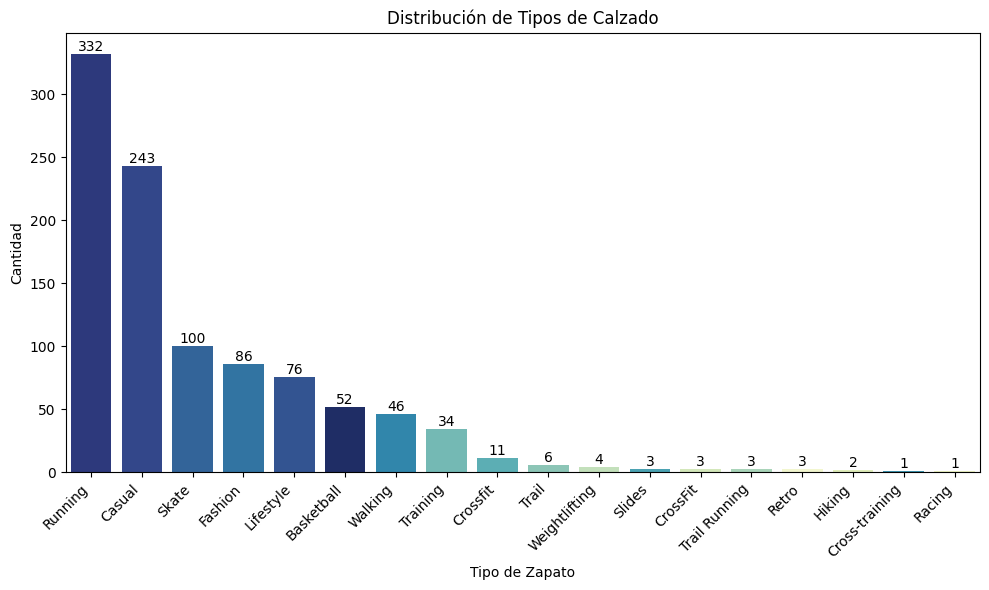

In [47]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Descargar la √∫ltima versi√≥n (si no se ha hecho ya)
# Este paso puede ser redundante si ya se ejecut√≥ la celda de descarga,
# pero asegura que 'path' est√© definido.
path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")

# Construir la ruta completa al archivo CSV (usando el nombre correcto)
file_path = os.path.join(path, "Shoe prices.csv")

# Cargar el DataFrame si a√∫n no est√° definido
if 'df' not in locals() and 'df' not in globals():
    df = pd.read_csv(file_path)

# Ahora que 'df' est√° definido, podemos usarlo para el gr√°fico
order = df['Type'].value_counts().index
plt.figure(figsize=(10, 6)) # Opcional: ajusta el tama√±o del gr√°fico
# Usar la paleta 'YlGnBu' INVERTIDA y guardar los ejes para a√±adir etiquetas
# Seguir sugerencia de Future warning: usar hue=df['Type'] y legend=False
ax = sns.countplot(x='Type', data=df, order=order, palette="YlGnBu_r", hue=df['Type'], legend=False) # CAMBIAR paleta a 'YlGnBu_r' (invertida) y a√±adir hue/legend

plt.title('Distribuci√≥n de Tipos de Calzado') # Puedes ajustar el t√≠tulo si es necesario
plt.xlabel('Tipo de Zapato')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x si son largas

# Agregar etiquetas de datos a las barras
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout() # Ajusta el dise√±o para evitar que las etiquetas se corten
plt.show()

El gr√°fico muestra que los tipos de zapatos m√°s frecuentes corresponden a categor√≠as como running y casual, mientras que otros, como skate o formal, tienen menor representaci√≥n. Esto sugiere que el mercado analizado se orienta principalmente hacia calzado deportivo y de uso cotidiano, lo cual puede estar alineado con las preferencias de consumo actuales. Este hallazgo preliminar es relevante para nuestra hip√≥tesis sobre, al confirmar la predominancia de los segmentos Running y Casual en la oferta.

In [48]:
import pandas as pd

# Crear el dataframe original
data = {
    "Type": ["Running","Casual","Skate","Fashion","Lifestyle","Basketball","Walking",
             "Training","Crossfit","Trail","Weightlifting","Slides","CrossFit",
             "Trail Running","Retro","Hiking","Cross-training","Racing"],
    "Cantidad": [332,243,100,86,76,52,46,34,11,6,4,3,3,3,3,2,1,1],
    "Porcentaje": [33.00,24.16,9.94,8.55,7.55,5.17,4.57,3.38,1.09,0.60,
                   0.40,0.30,0.30,0.30,0.30,0.20,0.10,0.10]
}

df_types = pd.DataFrame(data)

# Funci√≥n de segmentaci√≥n
def segmentar(p):
    if p >= 10:
        return "Alta"
    elif p >= 4:
        return "Media"
    else:
        return "Baja"

# Crear columna de segmentaci√≥n
df_types["Categoria"] = df_types["Porcentaje"].apply(segmentar)

# Formatear la columna porcentaje con el s√≠mbolo %
df_types["Porcentaje (%)"] = df_types["Porcentaje"].map("{:.2f}%".format)

# Reordenar columnas para la tabla final
df_types = df_types[["Type","Cantidad","Porcentaje (%)","Categoria"]]

# ---- Tabla 1: segmentada por tipo de zapato ----
print("üìä Distribuci√≥n de Tipos de Zapatos (Cantidad, Porcentaje y Categor√≠a):")
display(df_types)

# ---- Tabla 2: resumen por categor√≠a ----
resumen = (
    df_types.groupby("Categoria")["Cantidad"]
    .sum()
    .reset_index()
    .sort_values(by="Cantidad", ascending=False)
)

# Calcular porcentaje sobre el total
total = resumen["Cantidad"].sum()
resumen["Porcentaje (%)"] = (resumen["Cantidad"] / total * 100).map("{:.2f}%".format)

print("\nüìå Resumen por Categor√≠a (ordenado de mayor a menor):")
display(resumen)


üìä Distribuci√≥n de Tipos de Zapatos (Cantidad, Porcentaje y Categor√≠a):


Type  Cantidad Porcentaje (%) Categoria
0          Running       332         33.00%      Alta
1           Casual       243         24.16%      Alta
2            Skate       100          9.94%     Media
3          Fashion        86          8.55%     Media
4        Lifestyle        76          7.55%     Media
5       Basketball        52          5.17%     Media
6          Walking        46          4.57%     Media
7         Training        34          3.38%      Baja
8         Crossfit        11          1.09%      Baja
9            Trail         6          0.60%      Baja
10   Weightlifting         4          0.40%      Baja
11          Slides         3          0.30%      Baja
12        CrossFit         3          0.30%      Baja
13   Trail Running         3          0.30%      Baja
14           Retro         3          0.30%      Baja
15          Hiking         2          0.20%      Baja
16  Cross-training         1          0.10%      Baja
17          Racing         1          0.10%      Baja


üìå Resumen por Categor√≠a (ordenado de mayor a menor):


Categoria  Cantidad Porcentaje (%)
0      Alta       575         57.16%
2     Media       360         35.79%
1      Baja        71          7.06%

Del an√°lisis realizado se observa que el mercado presenta una clara concentraci√≥n en las categor√≠as de mayor participaci√≥n, donde los segmentos Running y Casual re√∫nen m√°s de la mitad de la demanda total (57,16%). Esto refleja la preferencia de los consumidores por productos asociados tanto al rendimiento deportivo como al uso cotidiano, consolidando a estas tipolog√≠as como pilares fundamentales del mercado.

En segundo lugar, las categor√≠as de participaci√≥n media alcanzan un 35,79%, lo que evidencia la existencia de un grupo significativo de consumidores que priorizan aspectos vinculados a la moda, el estilo de vida o deportes espec√≠ficos como el skate y el b√°squet. Este segmento intermedio constituye un espacio estrat√©gico para la diferenciaci√≥n y la construcci√≥n de identidad de marca.

Por √∫ltimo, las categor√≠as de menor peso representan apenas el 7,06% del total, lo que indica que los nichos especializados (como trail, crossfit o weightlifting) tienen una incidencia reducida. No obstante, estos pueden ofrecer oportunidades de posicionamiento en mercados selectos y de fidelizaci√≥n de consumidores con intereses muy espec√≠ficos.

En conclusi√≥n, el mercado se encuentra polarizado: altamente concentrado en dos segmentos dominantes, complementado por un grupo intermedio relevante y un conjunto reducido de nichos especializados. Este escenario sugiere que las marcas que busquen competitividad deber√°n asegurar una fuerte presencia en Running y Casual, al tiempo que aprovechan el potencial de diferenciaci√≥n que ofrecen las categor√≠as de participaci√≥n media.

In [49]:
# Agrupar por 'Brand' y contar los modelos √∫nicos
models_per_brand = df.groupby('Brand')['Model'].nunique().reset_index()
models_per_brand.columns = ['Brand', 'Numero de Modelos']

# Calcular el porcentaje de modelos de cada marca sobre el total de modelos √∫nicos
total_unique_models = models_per_brand['Numero de Modelos'].sum()
models_per_brand['Porcentaje'] = (models_per_brand['Numero de Modelos'] / total_unique_models) * 100 # Calcular el porcentaje como n√∫mero para la segmentaci√≥n

# Funci√≥n de segmentaci√≥n (la misma que antes)
def segmentar(p):
    if p >= 10:
        return "Alta"
    elif p >= 4:
        return "Media"
    else:
        return "Baja"

# Crear columna de segmentaci√≥n
models_per_brand["Categoria"] = models_per_brand["Porcentaje"].apply(segmentar)

# Formatear la columna porcentaje con el s√≠mbolo % para la visualizaci√≥n final
models_per_brand["Porcentaje (%)"] = models_per_brand["Porcentaje"].map("{:.2f}%".format)


# Ordenar por la cantidad de modelos descendente para ver las marcas con m√°s modelos primero
models_per_brand = models_per_brand.sort_values(by='Numero de Modelos', ascending=False)

print("üìä Cantidad y Porcentaje de Modelos √önicos por Marca:")
# Mostrar el DataFrame sin el √≠ndice
display(models_per_brand[['Brand', 'Numero de Modelos', 'Porcentaje (%)', 'Categoria']].style.hide(axis="index"))

# ---- Tabla 2: resumen por categor√≠a (basado en la distribuci√≥n de modelos por marca) ----
resumen_modelos_marca = (
    models_per_brand.groupby("Categoria")["Numero de Modelos"]
    .sum()
    .reset_index()
    .sort_values(by="Numero de Modelos", ascending=False)
)

# Calcular porcentaje sobre el total de modelos √∫nicos
total_resumen_modelos_marca = resumen_modelos_marca["Numero de Modelos"].sum()
resumen_modelos_marca["Porcentaje (%)"] = (resumen_modelos_marca["Numero de Modelos"] / total_resumen_modelos_marca * 100).map("{:.2f}%".format)

print("\nüìå Resumen por Categor√≠a de Modelos por Marca (ordenado de mayor a menor):")
display(resumen_modelos_marca.style.hide(axis="index"))

üìä Cantidad y Porcentaje de Modelos √önicos por Marca:



üìå Resumen por Categor√≠a de Modelos por Marca (ordenado de mayor a menor):


El an√°lisis de modelos √∫nicos por marca muestra que la mayor√≠a de las empresas se concentran en la categor√≠a Alta (71,97%), apostando por un portafolio amplio y diversificado. En cambio, marcas como Fila, Adidas y Converse, dentro de la categor√≠a Media (25,10%), optan por una estrategia m√°s acotada, enfocada en ciertos segmentos del mercado. Finalmente, Vans representa la categor√≠a Baja (2,93%), con un portafolio reducido y claramente dirigido a un nicho espec√≠fico. Esto evidencia que, mientras algunas marcas buscan abarcar m√∫ltiples categor√≠as, otras prefieren consolidarse en un nicho bien definido.

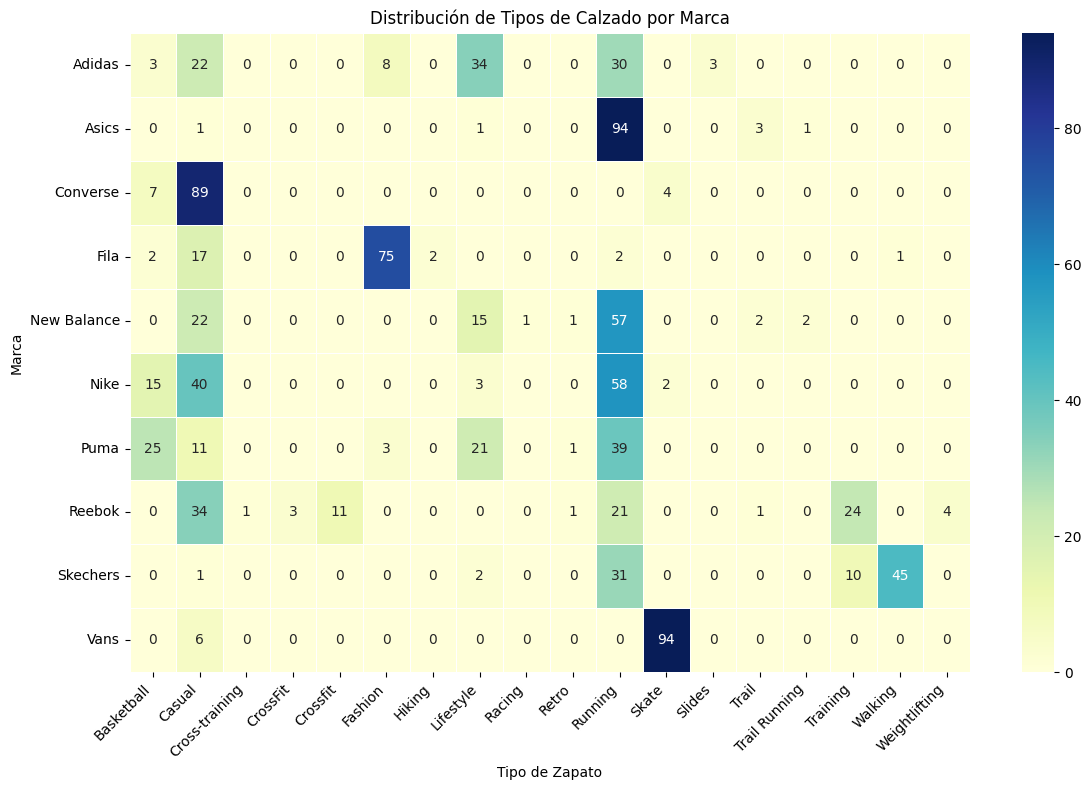

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de cada tipo de zapato por marca
brand_type_counts = df.groupby(['Brand', 'Type']).size().unstack(fill_value=0)

# Crear el mapa de calor
plt.figure(figsize=(12, 8)) # Ajusta el tama√±o seg√∫n necesites
sns.heatmap(brand_type_counts, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

plt.title('Distribuci√≥n de Tipos de Calzado por Marca')
plt.xlabel('Tipo de Zapato')
plt.ylabel('Marca')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

El an√°lisis de modelos √∫nicos por marca muestra que la mayor√≠a de las empresas se concentran en la categor√≠a Alta (71,97%), apostando por un portafolio amplio y diversificado. En cambio, marcas como Fila, Adidas y Converse, dentro de la categor√≠a Media (25,10%), optan por una estrategia m√°s acotada, enfocada en ciertos segmentos del mercado. Finalmente, Vans representa la categor√≠a Baja (2,93%), con un portafolio reducido y claramente dirigido a un nicho espec√≠fico. Esto evidencia que, mientras algunas marcas buscan abarcar m√∫ltiples categor√≠as, otras prefieren consolidarse en un nicho bien definido. Este hallazgo sobre las distintas estrategias de portafolio por marca es relevante para nuestra hip√≥tesis, ya que valida que las marcas adoptan enfoques diferenciados en cuanto a la diversidad de su oferta.

üìä Tabla de Contingencia: Brand vs Gender


Gender       Men  Women
Brand                  
Adidas        29     71
Asics         41     59
Converse      39     61
Fila          59     40
New Balance   58     42
Nike          88     30
Puma          69     31
Reebok        75     25
Skechers      36     53
Vans          41     59

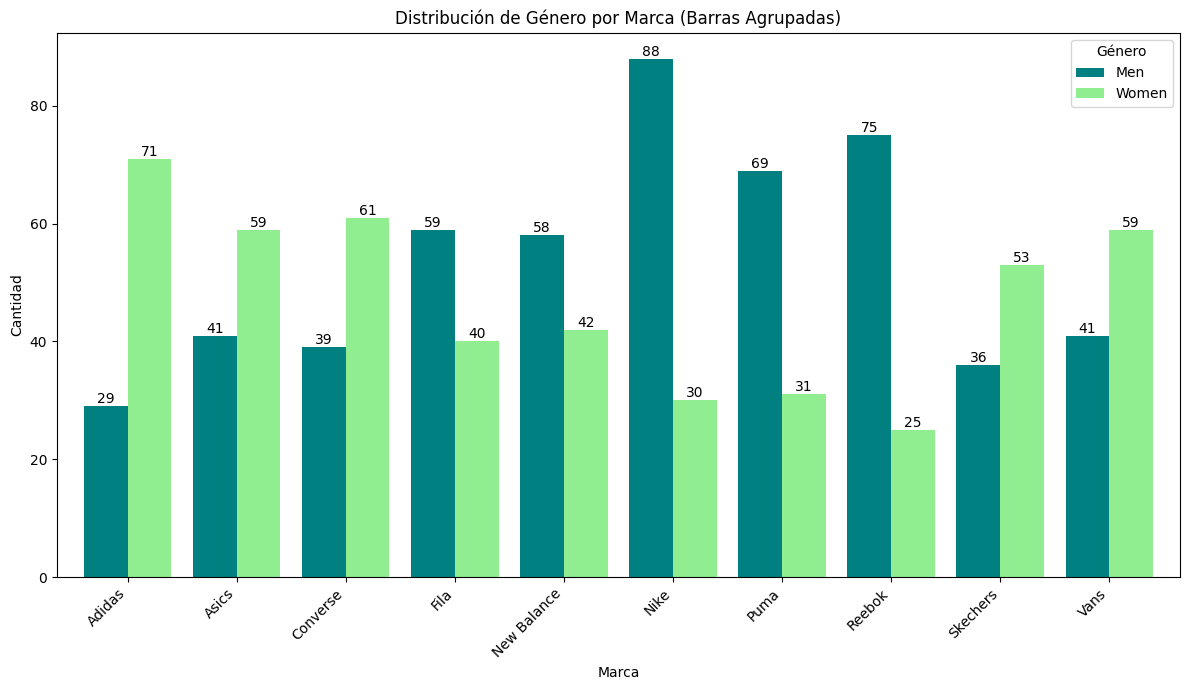

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import numpy as np

# Asegurar que el DataFrame df est√© cargado
try:
    if 'df' not in locals() and 'df' not in globals():
        # Descargar la √∫ltima versi√≥n (si no se ha hecho ya)
        path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
        # Construir la ruta completa al archivo CSV
        file_path = os.path.join(path, "Shoe prices.csv")
        df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}")
    # Considerar agregar un exit() o return si la carga es cr√≠tica
    # Para este caso, asumiremos que si falla la carga, el siguiente c√≥digo fallar√° de todos modos

# Limpiar la columna 'Price (USD)' y convertirla a num√©rica (necesario si vamos a usar precio en alg√∫n an√°lisis posterior o si la limpieza no se hizo globalmente)
# Aunque este c√≥digo no usa precio, es buena pr√°ctica si se usa el mismo df
# df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex= embalar.Errors='coerce')


# --- Tabla de Contingencia y Gr√°fico: Brand vs Gender ---

# Crear la tabla de contingencia
brand_gender_crosstab = pd.crosstab(df['Brand'], df['Gender'])

print("üìä Tabla de Contingencia: Brand vs Gender")
display(brand_gender_crosstab)

# # Crear el gr√°fico de barras apiladas - ELIMINADO
# brand_gender_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

# plt.title('Distribuci√≥n de G√©nero por Marca')
# plt.xlabel('Marca')
# plt.ylabel('Cantidad')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='G√©nero')
# plt.tight_layout()
# plt.show()

# Gr√°fico de barras agrupadas para comparar mejor las cantidades por g√©nero dentro de cada marca
fig, ax = plt.subplots(figsize=(12, 7)) # Crear figura y ejes expl√≠citamente
# Usar colores personalizados para 'Men' y 'Women'
colors = {'Men': 'teal', 'Women': 'lightgreen'} # Cambiado a verde suave para Women

brand_gender_crosstab.plot(kind='bar', stacked=False, ax=ax, width=0.8, color=[colors[col] for col in brand_gender_crosstab.columns]) # Usar colores personalizados

plt.title('Distribuci√≥n de G√©nero por Marca (Barras Agrupadas)')
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='G√©nero')

# Agregar: Cuadr√≠cula al gr√°fico - ELIMINADO
# y_max = brand_gender_crosstab.values.max()
# plt.yticks(np.arange(0, y_max + 10, 10))
# plt.grid(axis='y', linestyle='-', alpha=0.5, which='major')

# Agregar: Etiquetas de datos a las barras
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

La Distribuci√≥n de G√©nero por Marca revela que, si bien algunas marcas como New Balance muestran una oferta relativamente balanceada entre calzado para hombres y mujeres, otras como Nike tienen una clara predominancia de productos orientados a hombres, mientras que Adidas se inclinan m√°s hacia el p√∫blico femenino. Este patr√≥n sugiere diferentes enfoques de segmentaci√≥n de mercado por parte de las marcas.

üìä Tabla de Contingencia: Type vs Gender


Gender          Men  Women
Type                      
Basketball       39     13
Casual          135    108
Cross-training    1      0
CrossFit          3      0
Crossfit          9      2
Fashion          47     39
Hiking            0      2
Lifestyle        29     47
Racing            1      0
Retro             2      1
Running         173    159
Skate            41     59
Slides            0      3
Trail             3      3
Trail Running     2      1
Training         26      8
Walking          20     26
Weightlifting     4      0

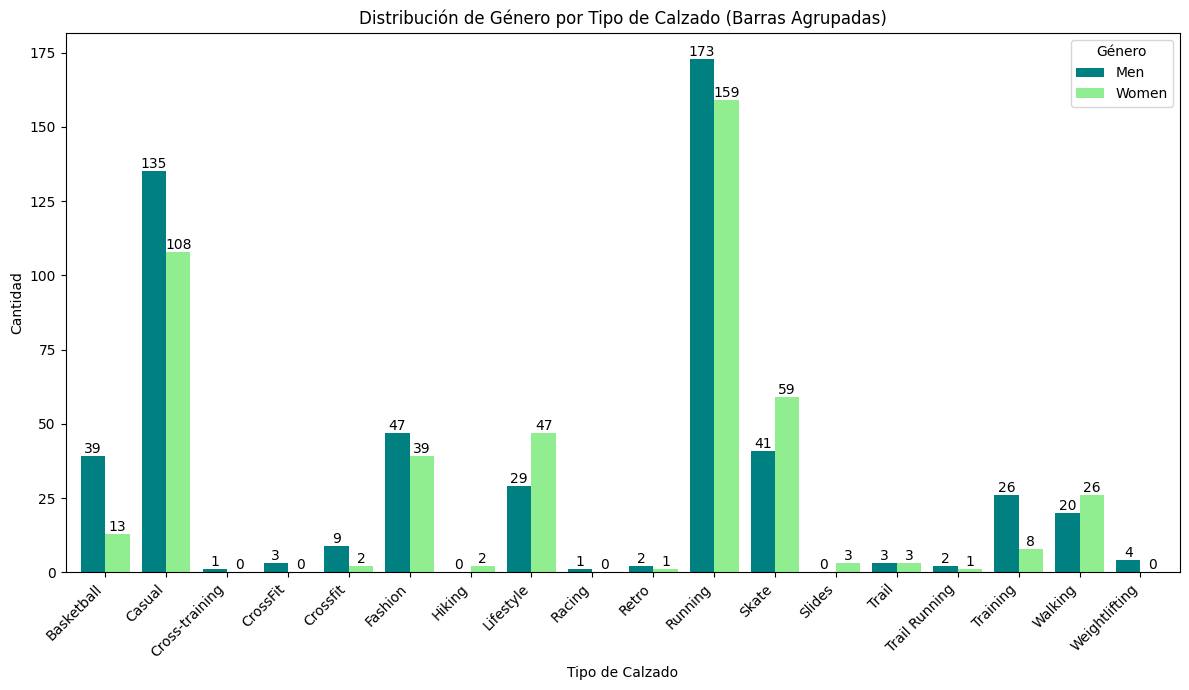

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# Asegurar que el DataFrame df est√© cargado
try:
    if 'df' not in locals() and 'df' not in globals():
        # Descargar la √∫ltima versi√≥n (si no se ha hecho ya)
        path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
        # Construir la ruta completa al archivo CSV
        file_path = os.path.join(path, "Shoe prices.csv")
        df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}")
    # Considerar agregar un exit() o return si la carga es cr√≠tica

# Limpiar la columna 'Price (USD)' y convertirla a num√©rica (necesario si vamos a usar precio en alg√∫n an√°lisis posterior o si la limpieza no se hizo globalmente)
# Aunque este c√≥digo no usa precio, es buena pr√°ctica si se usa el mismo df
# df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
# df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce')


# --- Tabla de Contingencia y Gr√°fico: Type vs Gender ---

# Crear la tabla de contingencia
type_gender_crosstab = pd.crosstab(df['Type'], df['Gender'])

print("üìä Tabla de Contingencia: Type vs Gender")
display(type_gender_crosstab)

# # Crear el gr√°fico de barras apiladas - ELIMINADO
# type_gender_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='YlGnBu') # CAMBIAR colormap a 'YlGnBu'

# plt.title('Distribuci√≥n de G√©nero por Tipo de Calzado')
# plt.xlabel('Tipo de Calzado')
# plt.ylabel('Cantidad')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='G√©nero')
# plt.tight_layout()
# plt.show()

# Opcional: Gr√°fico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 7)) # Crear figura y ejes expl√≠citamente
# Usar los mismos colores personalizados que en el gr√°fico de Marca vs G√©nero
colors = {'Men': 'teal', 'Women': 'lightgreen'}

type_gender_crosstab.plot(kind='bar', stacked=False, ax=ax, width=0.8, color=[colors[col] for col in type_gender_crosstab.columns]) # CAMBIAR colormap a 'YlGnBu', usar colores personalizados

plt.title('Distribuci√≥n de G√©nero por Tipo de Calzado (Barras Agrupadas)')
plt.xlabel('Tipo de Calzado')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='G√©nero')

# --- Agregar: Etiquetas de datos a las barras ---
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%d', label_type='edge')
# --- Fin de la adici√≥n ---

plt.tight_layout()
plt.show()

De manera similar, la **Distribuci√≥n de G√©nero por Tipo de Calzado** evidencia que ciertos tipos, como Basketball y Training, est√°n mayormente dirigidos a hombres, mientras que otros, como Lifestyle, Walking y Slides, tienen una mayor representaci√≥n en la oferta para mujeres. Tipos como Casual y Running muestran una distribuci√≥n de g√©nero m√°s pareja. Estos hallazgos son cruciales para entender las preferencias de g√©nero dentro de nichos de mercado espec√≠ficos y guiar estrategias de desarrollo de producto y marketing. Esta segmentaci√≥n por g√©nero dentro de los tipos de calzado valida aspectos de nuestra hip√≥tesis sobre la segmentaci√≥n del mercado por tipo y g√©nero, y es relevante para la identificaci√≥n de potenciales nichos desatendidos.

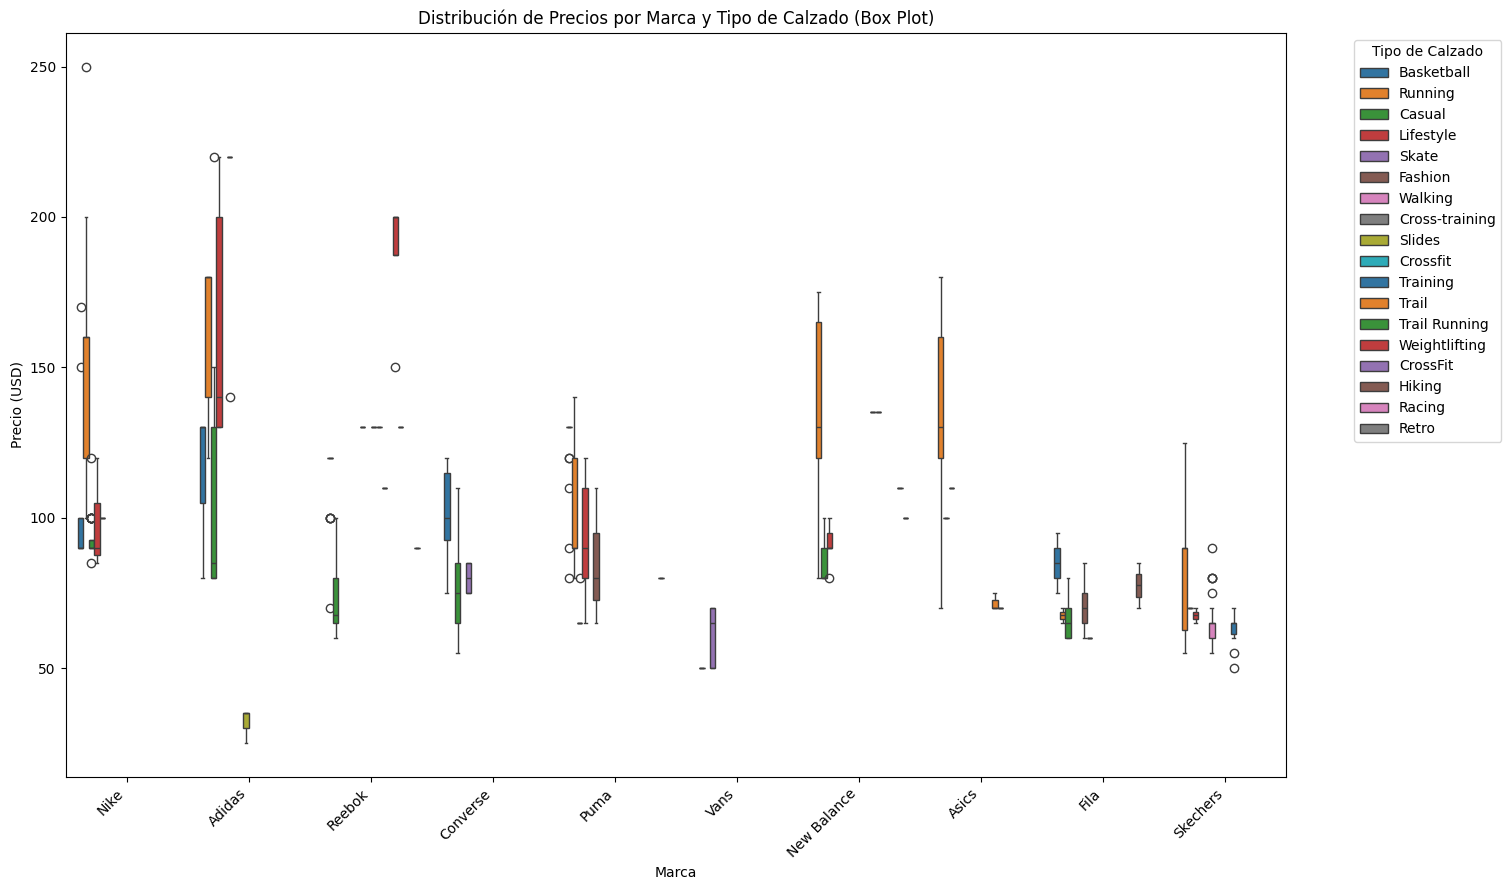

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import kagglehub
import os

# Asegurar que el DataFrame df est√© cargado
try:
    if 'df' not in locals() and 'df' not in globals():
        # Descargar la √∫ltima versi√≥n (si no se ha hecho ya)
        path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
        # Construir la ruta completa al archivo CSV
        file_path = os.path.join(path, "Shoe prices.csv")
        df = pd.read_csv(file_path) # Corregido: usar file_path
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}")
    # Si la carga falla, es mejor detenerse aqu√≠.
    exit()


# Limpiar la columna 'Price (USD)' y convertirla a num√©rica
# Eliminar el s√≠mbolo '$' y las comas, luego convertir a float
df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce') # Usar errors='coerce' para convertir errores a NaN

# Eliminar filas con valores NaN en 'Price (USD)' si hubo errores en la conversi√≥n
df_cleaned_price = df.dropna(subset=['Price (USD)']).copy()

# --- Box Plot: Precio por Marca, diferenciado por Tipo ---
plt.figure(figsize=(18, 9)) # Ajusta el tama√±o para mejor visualizaci√≥n

# seaborn.boxplot con hue='Type', usando paleta cualitativa
sns.boxplot(data=df_cleaned_price, x='Brand', y='Price (USD)', hue='Type', palette='tab10') # CAMBIAR paleta a 'tab10' u otra cualitativa

plt.title('Distribuci√≥n de Precios por Marca y Tipo de Calzado (Box Plot)')
plt.xlabel('Marca')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x si son largas
plt.legend(title='Tipo de Calzado', bbox_to_anchor=(1.05, 1), loc='upper left') # Mueve la leyenda fuera del gr√°fico
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajusta el dise√±o para dar espacio a la leyenda
plt.show()

Para obtener una comprensi√≥n m√°s profunda de las interacciones en el mercado de calzado, se realizaron an√°lisis multivariados explorando las relaciones entre Marca, Tipo, G√©nero y Precio.

El **Box Plot de Distribuci√≥n de Precios por Marca y Tipo de Calzado** complementa nuestro an√°lisis al visualizar c√≥mo el precio var√≠a en funci√≥n de la marca y el tipo de zapato. Se observa que Marcas como Nike y Adidas presentan rangos de precios significativamente m√°s altos para tipos deportivos como Running o Basketball en comparaci√≥n con otras marcas o tipos casuales. Asimismo, dentro de una misma marca, la distribuci√≥n de precios difiere notablemente entre tipos; por ejemplo, los modelos de Running tienden a tener una mediana de precio mayor que los modelos Casual para la mayor√≠a de las marcas con oferta en ambos tipos. La presencia de valores at√≠picos en ciertas combinaciones de marca y tipo sugiere la existencia de productos de gama muy alta o variaciones significativas en el precio dentro de nichos espec√≠ficos.

Este an√°lisis visual del precio por segmentaci√≥n de producto es fundamental para entender la estructura de valor en el mercado.

Estos an√°lisis multivariados en conjunto confirman la complejidad del mercado, donde las estrategias de marca, la segmentaci√≥n por tipo y g√©nero, y el posicionamiento de precios interact√∫an para definir la oferta de productos y apuntar a segmentos de mercado espec√≠ficos.

Estos hallazgos en el Box Plot de precios son cruciales para validar nuestra hip√≥tesis principal sobre la polarizaci√≥n en la estructura de precios del mercado y c√≥mo el valor percibido est√° fuertemente ligado al uso espec√≠fico y al posicionamiento de la marca.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Tabla de Contingencia: Brand vs Type ---

# Crear la tabla de contingencia
# Ya visualizamos esto con el heatmap, esta tabla da los n√∫meros exactos
brand_type_crosstab = pd.crosstab(df['Brand'], df['Type'])

print("üìä Tabla de Contingencia: Brand vs Type")
display(brand_type_crosstab)

# Nota: Graficar esto con barras (apiladas o agrupadas) puede ser muy denso
# debido a la cantidad de tipos. El heatmap (celda 720e0725) es generalmente
# una mejor visualizaci√≥n para esta combinaci√≥n.
# Si a√∫n deseas el gr√°fico de barras, puedes descomentar el siguiente c√≥digo:

# brand_type_crosstab.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
# plt.title('Distribuci√≥n de Tipos de Calzado por Marca')
# plt.xlabel('Marca')
# plt.ylabel('Cantidad')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Tipo de Calzado', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout(rect=[0, 0, 0.85, 1])
# plt.show()

üìä Tabla de Contingencia: Brand vs Type


Type         Basketball  Casual  Cross-training  CrossFit  Crossfit  Fashion  \
Brand                                                                          
Adidas                3      22               0         0         0        8   
Asics                 0       1               0         0         0        0   
Converse              7      89               0         0         0        0   
Fila                  2      17               0         0         0       75   
New Balance           0      22               0         0         0        0   
Nike                 15      40               0         0         0        0   
Puma                 25      11               0         0         0        3   
Reebok                0      34               1         3        11        0   
Skechers              0       1               0         0         0        0   
Vans                  0       6               0         0         0        0   

Type         Hiking  Lifestyle  Racing  Retro  Running  Skate  Slides  Trail  \
Brand                                                                          
Adidas            0         34       0      0       30      0       3      0   
Asics             0          1       0      0       94      0       0      3   
Converse          0          0       0      0        0      4       0      0   
Fila              2          0       0      0        2      0       0      0   
New Balance       0         15       1      1       57      0       0      2   
Nike              0          3       0      0       58      2       0      0   
Puma              0         21       0      1       39      0       0      0   
Reebok            0          0       0      1       21      0       0      1   
Skechers          0          2       0      0       31      0       0      0   
Vans              0          0       0      0        0     94       0      0   

Type         Trail Running  Training  Walking  Weightlifting  
Brand                                                         
Adidas                   0         0        0              0  
Asics                    1         0        0              0  
Converse                 0         0        0              0  
Fila                     0         0        1              0  
New Balance              2         0        0              0  
Nike                     0         0        0              0  
Puma                     0         0        0              0  
Reebok                   0        24        0              4  
Skechers                 0        10       45              0  
Vans                     0         0        0              0

La tabla de contingencia de Marca vs. Tipo  nos indica qu√© marcas ofrecen qu√© tipos de calzado y en qu√© cantidades. Vemos que algunas marcas se especializan ej: Converse en Casual, Vans en Skate, Asics en Running/Trail, mientras que otras tienen una oferta m√°s diversificada ej: Nike, Adidas, Puma, New Balance, Reebok.

Este an√°lisis es relevante para nuestra hip√≥tesis sobre las diferentes estrategias de marca en cuanto a la diversidad de su oferta y la potencial identificaci√≥n de nichos basados en la especializaci√≥n por tipo de calzado.

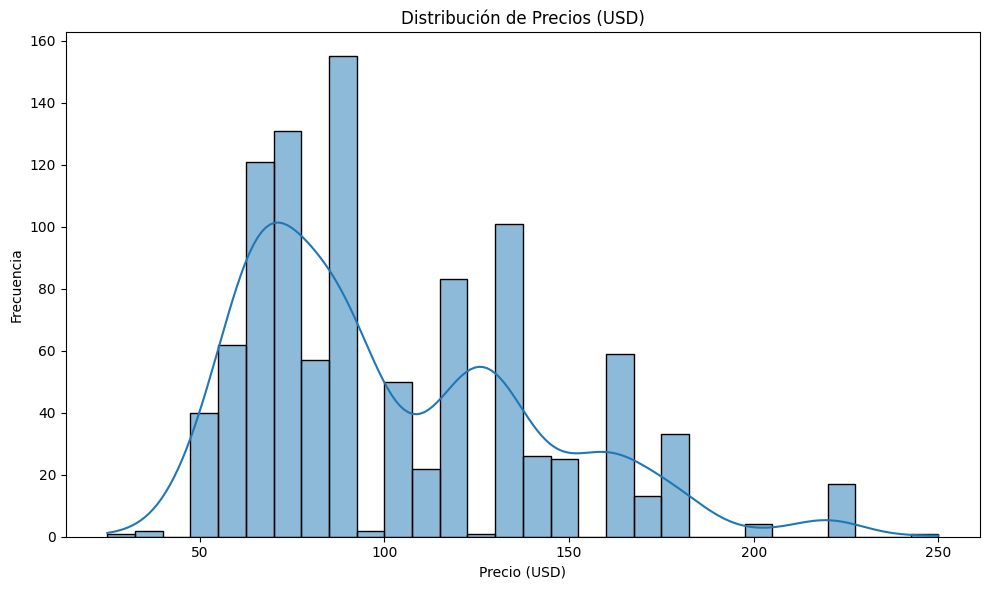

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Limpiar la columna 'Price (USD)' y convertirla a num√©rica
# Eliminar el s√≠mbolo '$' y las comas, luego convertir a float
df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce') # Usar errors='coerce' para convertir errores a NaN

# Eliminar filas con valores NaN en 'Price (USD)' si hubo errores en la conversi√≥n
df_cleaned_price = df.dropna(subset=['Price (USD)']).copy()


# Crear el histograma de precios
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned_price, x='Price (USD)', bins=30, kde=True) # bins ajusta el n√∫mero de barras, kde agrega una l√≠nea de densidad

plt.title('Distribuci√≥n de Precios (USD)')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

El histograma de distribuci√≥n de precios muestra que la mayor parte de los productos se concentran en el rango de 50 a 120 USD, con picos marcados entre 70 y 100 USD, lo que refleja que el mercado se orienta principalmente a una oferta de gama media-baja. La forma de la distribuci√≥n evidencia un sesgo hacia la derecha, ya que existen menos productos en rangos de precios m√°s altos (150 a 250 USD). Sin embargo, la presencia de modelos en este extremo superior sugiere que algunas marcas ofrecen productos premium o ediciones especiales que buscan captar un segmento exclusivo, aunque en vol√∫menes menores.

Using Colab cache for faster access to the 'shoe-prices-dataset' dataset.
üìä Precio Promedio por Tipo de Calzado:


Type Precio Promedio (USD) fmt
17   Weightlifting                   $187.50
2   Cross-training                   $130.00
4         Crossfit                   $130.00
3         CrossFit                   $130.00
10         Running                   $129.08
7        Lifestyle                   $122.83
14   Trail Running                   $113.33
0       Basketball                   $112.69
15        Training                   $110.29
8           Racing                   $110.00
13           Trail                    $99.17
9            Retro                    $90.00
5          Fashion                    $83.90
1           Casual                    $79.94
6           Hiking                    $77.50
16         Walking                    $64.98
11           Skate                    $62.20
12          Slides                    $31.67

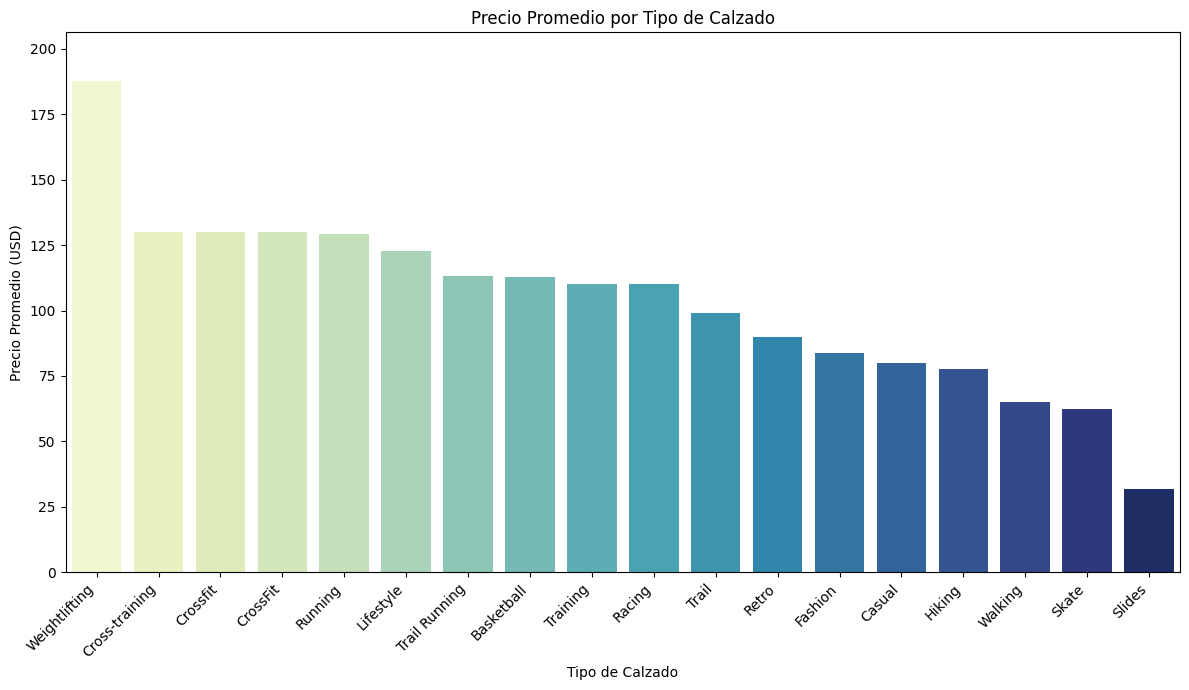

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import kagglehub
import os

# Asegurar que el DataFrame df est√© cargado
try:
    if 'df' not in locals() and 'df' in globals(): # Corregido: 'df' in globals() para chequear si ya existe globalmente
        pass # df ya est√° cargado
    else:
        # Descargar la √∫ltima versi√≥n (si no se ha hecho ya)
        path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
        # Construir la ruta completa al archivo CSV
        file_path = os.path.join(path, "Shoe prices.csv")
        df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}")
    # Si la carga falla, es mejor detenerse aqu√≠.
    exit()


# Limpiar la columna 'Price (USD)' y convertirla a num√©rica
df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce') # Usar errors='coerce' para convertir errores a NaN

# Eliminar filas con valores NaN en 'Price (USD)' si hubo errores en la conversi√≥n
df_cleaned_price = df.dropna(subset=['Price (USD)']).copy()

# --- Calcular el precio promedio por Tipo de Calzado ---
# Corregido: quitar el corchete ']' del nombre de la columna
average_price_by_type = df_cleaned_price.groupby('Type')['Price (USD)'].mean().reset_index()
average_price_by_type.columns = ['Type', 'Precio Promedio (USD)']

# Ordenar por precio promedio descendente para mejor visualizaci√≥n
average_price_by_type = average_price_by_type.sort_values(by='Precio Promedio (USD)', ascending=False)

# --- Formatear la columna de Precio Promedio con signo de d√≥lar y 2 decimales ---
average_price_by_type['Precio Promedio (USD) fmt'] = average_price_by_type['Precio Promedio (USD)'].map('${:.2f}'.format)
# --- Fin de la modificaci√≥n ---

print("üìä Precio Promedio por Tipo de Calzado:")
display(average_price_by_type[['Type', 'Precio Promedio (USD) fmt']]) # Mostrar la columna formateada

# --- Crear un gr√°fico de barras del precio promedio por Tipo ---
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=average_price_by_type,
    x='Type',
    y='Precio Promedio (USD)',
    hue='Type',                # Se agrega hue para compatibilidad futura
    palette='YlGnBu',
    legend=False               # Evita mostrar la leyenda duplicada
)

plt.title('Precio Promedio por Tipo de Calzado')
plt.xlabel('Tipo de Calzado')
plt.ylabel('Precio Promedio (USD)')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x

# --- Asegurar que el eje Y comience en 0 ---
plt.ylim(0, average_price_by_type['Precio Promedio (USD)'].max() * 1.1) # Establecer el l√≠mite inferior en 0 y un poco por encima del m√°ximo
# --- Fin de la adici√≥n ---

plt.tight_layout()
plt.show()


Al observar los precios promedio por tipo de calzado, se confirma una segmentaci√≥n clara en funci√≥n del uso. Los tipos relacionados con alto rendimiento, como Weightlifting, Cross-training, Crossfit y Running, presentan precios promedio m√°s elevados, posicion√°ndose como categor√≠as premium dentro del mercado. En contraste, los tipos de uso cotidiano o recreativo, como Casual, Fashion, Hiking, Walking y Skate, se encuentran en valores m√°s bajos, generalmente entre 60 y 90 USD, reflejando su enfoque en la masividad y accesibilidad. Los Slides, con un precio promedio de 31.67 USD, representan la categor√≠a m√°s econ√≥mica y dirigida al consumo b√°sico.

El gr√°fico de barras de precio promedio por tipo refuerza esta tendencia, mostrando visualmente c√≥mo los calzados especializados en alto rendimiento se ubican consistentemente en la parte superior del espectro de precios, mientras que los productos casuales y lifestyle se concentran en el rango inferior. Esto indica que las marcas adoptan una doble estrategia: por un lado, captar grandes vol√∫menes de consumidores mediante productos accesibles y de uso diario, y por otro, posicionar l√≠neas de alto rendimiento con precios m√°s altos que apuntan a nichos espec√≠ficos y generan una percepci√≥n de exclusividad y valor agregado.

Este an√°lisis del precio promedio por tipo es fundamental para validar nuestra hip√≥tesis sobre la polarizaci√≥n de la estructura de precios basada en el tipo de calzado y el valor percibido asociado a su uso espec√≠fico.

----

Entrega final

---

### An√°lisis de Atributos y Reducci√≥n de Dimensionalidad

En esta segunda etapa, procederemos a analizar los diferentes atributos del DataFrame para identificar aquellos de mayor relevancia para nuestro an√°lisis. Bajo esta premisa, eliminaremos tres atributos que consideramos de bajo nivel de relevancia seg√∫n la hip√≥tesis que estamos manejando.

### An√°lisis de Atributos y Reducci√≥n de Dimensionalidad

En esta etapa, realizamos un an√°lisis y preparaci√≥n inicial de los atributos del dataset con el objetivo de identificar y seleccionar aquellas variables m√°s relevantes para nuestro an√°lisis predictivo, simplificando el conjunto de datos para las siguientes fases del proyecto.

#### Eliminaci√≥n Inicial de Atributos

Procedimos a eliminar tres atributos espec√≠ficos del DataFrame que, seg√∫n la hip√≥tesis de an√°lisis y la relevancia percibida para la predicci√≥n de precios en este contexto, consideramos de bajo nivel de relevancia. Las columnas eliminadas fueron 'Gender', 'Size' y 'Material'.

El siguiente c√≥digo muestra la carga inicial del DataFrame, la limpieza de la columna de precio y la eliminaci√≥n de estas tres columnas:

In [57]:
print("Columns")
df.columns

Columns


Index(['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material',
       'Price (USD)'],
      dtype='object')

In [58]:
import pandas as pd
# No necesitamos importar kagglehub, os, numpy aqu√≠ si ya tenemos el DataFrame cargado y limpio
# import kagglehub
# import os
# import numpy as np

# --- Asegurar que el DataFrame limpio est√© disponible ---
# Asumimos que df_cleaned_price (o un DataFrame similar con el precio limpio)
# ya existe de ejecuciones anteriores.

df_to_process = pd.DataFrame() # Inicializar df_to_process
if 'df_cleaned_price' not in locals() and 'df_cleaned_price' not in globals():
    print("DataFrame 'df_cleaned_price' no encontrado. Aseg√∫rese de que la celda de carga y limpieza inicial se haya ejecutado correctamente.")
    # En un flujo de trabajo real, podr√≠as a√±adir aqu√≠ la l√≥gica para cargar y limpiar si no existe
    # Para este ejemplo, si no est√° disponible, df_to_process se quedar√° vac√≠o.
else:
    # Si df_cleaned_price existe, lo asignamos a df_to_process
    if 'df_cleaned_price' in locals():
        df_to_process = df_cleaned_price.copy() # Trabajar sobre una copia para no modificar el original
    elif 'df_cleaned_price' in globals():
        df_to_process = df_cleaned_price.copy() # Trabajar sobre una copia para no modificar el original


# --- Eliminar las columnas especificadas (Gender, Size, Material) ---
if not df_to_process.empty:
    # Definir la lista de columnas a eliminar, similar a tu ejemplo
    columns_to_drop_manual = ['Gender', 'Size']

    print(f"\nColumnas originales en el DataFrame (asumiendo df_cleaned_price): {df_to_process.shape[1]}")

    # Eliminar las columnas del DataFrame
    # Usamos errors='ignore' para no generar un error si alguna columna ya no existe
    df_reduced_manual = df_to_process.drop(columns=columns_to_drop_manual, errors='ignore')

    print(f"Columnas despu√©s de eliminar {columns_to_drop_manual}: {df_reduced_manual.shape[1]}")

    print("\nPrimeras 5 filas del DataFrame con columnas eliminadas ('df_reduced_manual'):")
    display(df_reduced_manual.head())

    print("\nNombres de las columnas restantes:")
    print(list(df_reduced_manual.columns))

else:
    print("\nNo se realiz√≥ la eliminaci√≥n de columnas porque el DataFrame inicial no estaba disponible o estaba vac√≠o.")
    df_reduced_manual = pd.DataFrame() # Asegurar que df_reduced_manual est√© vac√≠o


# Ahora puedes usar 'df_reduced_manual' para continuar con el pre-procesamiento y modelado
# Este DataFrame tiene las columnas 'Gender', 'Size' y 'Material' eliminadas.


Columnas originales en el DataFrame (asumiendo df_cleaned_price): 8
Columnas despu√©s de eliminar ['Gender', 'Size']: 6

Primeras 5 filas del DataFrame con columnas eliminadas ('df_reduced_manual'):


Brand            Model        Type      Color   Material  Price (USD)
0      Nike     Air Jordan 1  Basketball  Red/Black    Leather        170.0
1    Adidas   Ultra Boost 21     Running      Black  Primeknit        180.0
2    Reebok  Classic Leather      Casual      White    Leather         75.0
3  Converse     Chuck Taylor      Casual       Navy     Canvas         55.0
4      Puma     Future Rider   Lifestyle       Pink       Mesh         80.0


Nombres de las columnas restantes:
['Brand', 'Model', 'Type', 'Color', 'Material', 'Price (USD)']


# Limpieza de Nombres de Columnas
Para asegurar la consistencia y facilitar el manejo program√°tico de las columnas en las etapas posteriores, aplicamos un proceso de limpieza a los nombres de los atributos restantes en el DataFrame.

El siguiente c√≥digo estandariza los nombres de las columnas convirti√©ndolos a min√∫sculas, eliminando espacios al inicio y final, reemplazando espacios internos por guiones bajos y removiendo par√©ntesis:

In [59]:
import pandas as pd

# Asegurar que df_reduced_manual est√© disponible
if 'df_reduced_manual' not in locals() and 'df_reduced_manual' not in globals():
    print("DataFrame 'df_reduced_manual' no encontrado. Aseg√∫rese de que la celda de eliminaci√≥n de columnas se haya ejecutado correctamente.")
    # Si no est√° disponible, no podemos aplicar la limpieza de nombres.
    # Considera agregar un exit() o return aqu√≠ en un flujo de trabajo real.
else:
    # --- Aplicar la limpieza a los nombres de las columnas ---
    # Creamos una copia para no modificar el DataFrame original si no es necesario, aunque aqu√≠ sobreescribimos las columnas
    df_cleaned_cols = df_reduced_manual.copy()

    df_cleaned_cols.columns = df_cleaned_cols.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

    print("Nombres de columnas antes de la limpieza:")
    print(list(df_reduced_manual.columns))

    print("\nNombres de columnas despu√©s de la limpieza:")
    print(list(df_cleaned_cols.columns))

    # Puedes mostrar las primeras filas para ver el resultado con los nuevos nombres
    print("\nPrimeras 5 filas del DataFrame con nombres de columnas limpiados:")
    display(df_cleaned_cols.head())

    # Ahora puedes usar 'df_cleaned_cols' para los siguientes pasos

Nombres de columnas antes de la limpieza:
['Brand', 'Model', 'Type', 'Color', 'Material', 'Price (USD)']

Nombres de columnas despu√©s de la limpieza:
['brand', 'model', 'type', 'color', 'material', 'price_usd']

Primeras 5 filas del DataFrame con nombres de columnas limpiados:


brand            model        type      color   material  price_usd
0      Nike     Air Jordan 1  Basketball  Red/Black    Leather      170.0
1    Adidas   Ultra Boost 21     Running      Black  Primeknit      180.0
2    Reebok  Classic Leather      Casual      White    Leather       75.0
3  Converse     Chuck Taylor      Casual       Navy     Canvas       55.0
4      Puma     Future Rider   Lifestyle       Pink       Mesh       80.0

### An√°lisis de Valores Faltantes (Usando la Funci√≥n Definida)

Ahora, llamaremos a la funci√≥n `analyze_missing_values` que definimos en la celda anterior para examinar los valores nulos en nuestro DataFrame `df_cleaned_cols` (el DataFrame con nombres de columnas limpiados y columnas eliminadas).

In [60]:
def analyze_missing_values(df):

    # Calcular valores nulos
    missing_values = df.isna().sum()
    missing_percentage = ((df.isna().sum() / len(df)) * 100).round(2)

    # Crear DataFrame
    missing_df = pd.DataFrame({
        "Cantidad_Nulos": missing_values,
        "Porcentaje_Nulos": missing_percentage
    })

    # Ordenar por porcentaje de nulos
    missing_df = missing_df.sort_values(by="Porcentaje_Nulos", ascending=False)
    return missing_df

In [61]:
missing_df = analyze_missing_values(df)
missing_df

Cantidad_Nulos  Porcentaje_Nulos
Brand                     0               0.0
Model                     0               0.0
Type                      0               0.0
Gender                    0               0.0
Size                      0               0.0
Color                     0               0.0
Material                  0               0.0
Price (USD)               0               0.0

In [62]:
def remove_duplicates_with_info(df):
    """
    Removes duplicate rows from a DataFrame and prints information about the process.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: The DataFrame with duplicate rows removed.
    """
    original_rows = df.shape[0]
    df_cleaned = df.drop_duplicates().copy() # Usar .copy() para evitar SettingWithCopyWarning
    rows_removed = original_rows - df_cleaned.shape[0]

    print(f"Original number of rows: {original_rows}")
    print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")
    print(f"Number of duplicate rows removed: {rows_removed}")

    return df_cleaned

In [63]:
df = remove_duplicates_with_info(df)

Original number of rows: 1006
Number of rows after removing duplicates: 925
Number of duplicate rows removed: 81


In [64]:
import pandas as pd
import numpy as np # Importar numpy para isnull().sum()

# --- Definir la funci√≥n quick_unique_count ---
def quick_unique_count(df, columns=None):

    if columns is None:
        columns = df.columns

    print("üìä CONTEO Y AN√ÅLISIS R√ÅPIDO DE VALORES √öNICOS POR COLUMNA")

    for col in columns:
        if col in df.columns:
            print("-" * 40) # Separador para cada columna
            print(f"üî¨ Columna: {col}")

            unique_count = df[col].nunique()
            total_count = len(df[col])
            # Usar .isnull().sum() con numpy o pandas si es serie
            null_count = df[col].isnull().sum() if isinstance(df[col], pd.Series) else np.sum(pd.isnull(df[col])) # Asegurar que funcione si no es Series

            # Manejar caso de columna vac√≠a o sin moda
            moda_value = df[col].mode()
            moda_str = ', '.join(map(str, moda_value.tolist())) if not moda_value.empty else "N/A" # Convertir moda a string legible


            print(f"   ‚Ä¢ Tipo de dato: {df[col].dtype}")
            print(f"   ‚Ä¢ Valores √∫nicos: {unique_count:,}")
            print(f"   ‚Ä¢ Valor de la moda: {moda_str}")
            print(f"   ‚Ä¢ Total de valores: {total_count:,}")
            print(f"   ‚Ä¢ Valores nulos: {null_count:,}")

            # Evitar divisi√≥n por cero si total_count es 0
            if total_count > 0:
                 print(f"   ‚Ä¢ % √önicos: {(unique_count/total_count*100):.1f}%")
            else:
                 print("   ‚Ä¢ % √önicos: N/A (DataFrame vac√≠o)")


            # Mostrar algunos valores √∫nicos (especial manejo para floats)
            if unique_count == 0:
                 print("   ‚Ä¢ Valores: Columna vac√≠a")
            elif unique_count <= 10:
                # Convertir a lista y manejar nulos si dropna=True
                unique_vals = df[col].dropna().unique()
                # Ordenar solo si los tipos de datos son comparables
                try:
                    sorted_unique_vals = sorted(unique_vals, key=str) # Ordenar como string para evitar errores de tipo
                    print(f"   ‚Ä¢ Valores: {sorted_unique_vals}")
                except TypeError:
                     print(f"   ‚Ä¢ Valores: {list(unique_vals)} (No se pudo ordenar)")

            elif df[col].dtype in ['float64', 'float32', 'int64', 'int32']: # Incluir ints para rango
                # Para tipos num√©ricos, mostrar rango
                min_val = df[col].min() if null_count < total_count else np.nan # Manejar caso solo nulos
                max_val = df[col].max() if null_count < total_count else np.nan # Manejar caso solo nulos
                if not pd.isna(min_val) and not pd.isna(max_val):
                     print(f"   ‚Ä¢ Rango: [{min_val:.2f} - {max_val:.2f}]")
                elif total_count > 0 and null_count == total_count:
                     print("   ‚Ä¢ Rango: Todos los valores son nulos")
                else:
                     print("   ‚Ä¢ Rango: N/A (Problema al calcular rango)")

            else:
                # Mostrar ejemplos para otras columnas con muchos valores √∫nicos
                sample_vals = df[col].dropna().unique()[:5] # Mostrar 5 ejemplos
                print(f"   ‚Ä¢ Ejemplos: {list(sample_vals)}")


        else:
            print(f"‚ö†Ô∏è Columna '{col}' no encontrada en el DataFrame.")

    print("-" * 40) # Separador final


# --- Llamar a la funci√≥n quick_unique_count ---

# Asegurar que un DataFrame est√© disponible para el an√°lisis
df_to_analyze = None

if 'df_deduplicated' in locals() or 'df_deduplicated' in globals():
    df_to_analyze = df_deduplicated
    print("Usando 'df_deduplicated' para el conteo de valores √∫nicos.")
elif 'df_cleaned_cols' in locals() or 'df_cleaned_cols' in globals():
    df_to_analyze = df_cleaned_cols
    print("Usando 'df_cleaned_cols' para el conteo de valores √∫nicos.")
elif 'df_reduced_manual' in locals() or 'df_reduced_manual' in globals():
    df_to_analyze = df_reduced_manual
    print("Usando 'df_reduced_manual' para el conteo de valores √∫nicos.")
elif 'df' in locals() or 'df' in globals():
    # Si los DataFrames procesados no est√°n, usar el df original (con precio limpio si es posible)
    if df['Price (USD)'].dtype == 'object': # Verificar si precio necesita limpieza
         df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
         df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce')
    df_to_analyze = df.dropna(subset=['Price (USD)']).copy()
    print("Usando 'df' (con precio limpio) para el conteo de valores √∫nicos.")
else:
    print("No se encontraron DataFrames adecuados para el an√°lisis de valores √∫nicos.")


if df_to_analyze is not None and not df_to_analyze.empty:
    # Llamar a la funci√≥n para todas las columnas del DataFrame disponible
    quick_unique_count(df_to_analyze)

    # Si quieres analizar solo columnas espec√≠ficas, puedes pasar una lista:
    # quick_unique_count(df_to_analyze, columns=['brand', 'type', 'price_usd']) # Ejemplo

else:
    print("\nNo se realiz√≥ el an√°lisis de valores √∫nicos porque el DataFrame no est√° disponible o est√° vac√≠o.")

Usando 'df_cleaned_cols' para el conteo de valores √∫nicos.
üìä CONTEO Y AN√ÅLISIS R√ÅPIDO DE VALORES √öNICOS POR COLUMNA
----------------------------------------
üî¨ Columna: brand
   ‚Ä¢ Tipo de dato: object
   ‚Ä¢ Valores √∫nicos: 10
   ‚Ä¢ Valor de la moda: Nike
   ‚Ä¢ Total de valores: 1,006
   ‚Ä¢ Valores nulos: 0
   ‚Ä¢ % √önicos: 1.0%
   ‚Ä¢ Valores: ['Adidas', 'Asics', 'Converse', 'Fila', 'New Balance', 'Nike', 'Puma', 'Reebok', 'Skechers', 'Vans']
----------------------------------------
üî¨ Columna: model
   ‚Ä¢ Tipo de dato: object
   ‚Ä¢ Valores √∫nicos: 239
   ‚Ä¢ Valor de la moda: NMD_R1, Sk8-Hi
   ‚Ä¢ Total de valores: 1,006
   ‚Ä¢ Valores nulos: 0
   ‚Ä¢ % √önicos: 23.8%
   ‚Ä¢ Ejemplos: ['Air Jordan 1', 'Ultra Boost 21', 'Classic Leather', 'Chuck Taylor', 'Future Rider']
----------------------------------------
üî¨ Columna: type
   ‚Ä¢ Tipo de dato: object
   ‚Ä¢ Valores √∫nicos: 18
   ‚Ä¢ Valor de la moda: Running
   ‚Ä¢ Total de valores: 1,006
   ‚Ä¢ Valores nul

Usando 'df_cleaned_cols' para graficar distribuciones.

Generando gr√°ficos de distribuci√≥n por tipo de dato...
Columnas num√©ricas encontradas para graficar: 1
Columnas categ√≥ricas encontradas para graficar: 5


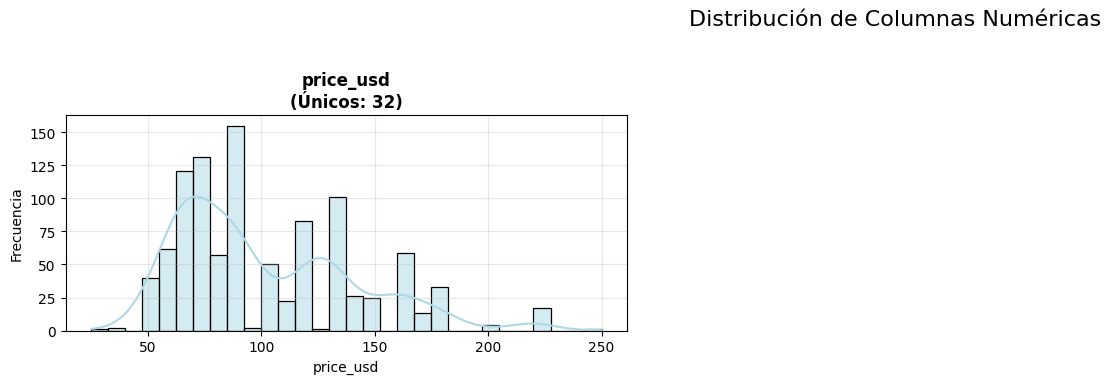

Mostrando Top 10 categor√≠as para la columna 'model' (total √∫nicos: 239)
Mostrando Top 10 categor√≠as para la columna 'type' (total √∫nicos: 18)
Mostrando Top 10 categor√≠as para la columna 'color' (total √∫nicos: 82)
Mostrando Top 10 categor√≠as para la columna 'material' (total √∫nicos: 34)


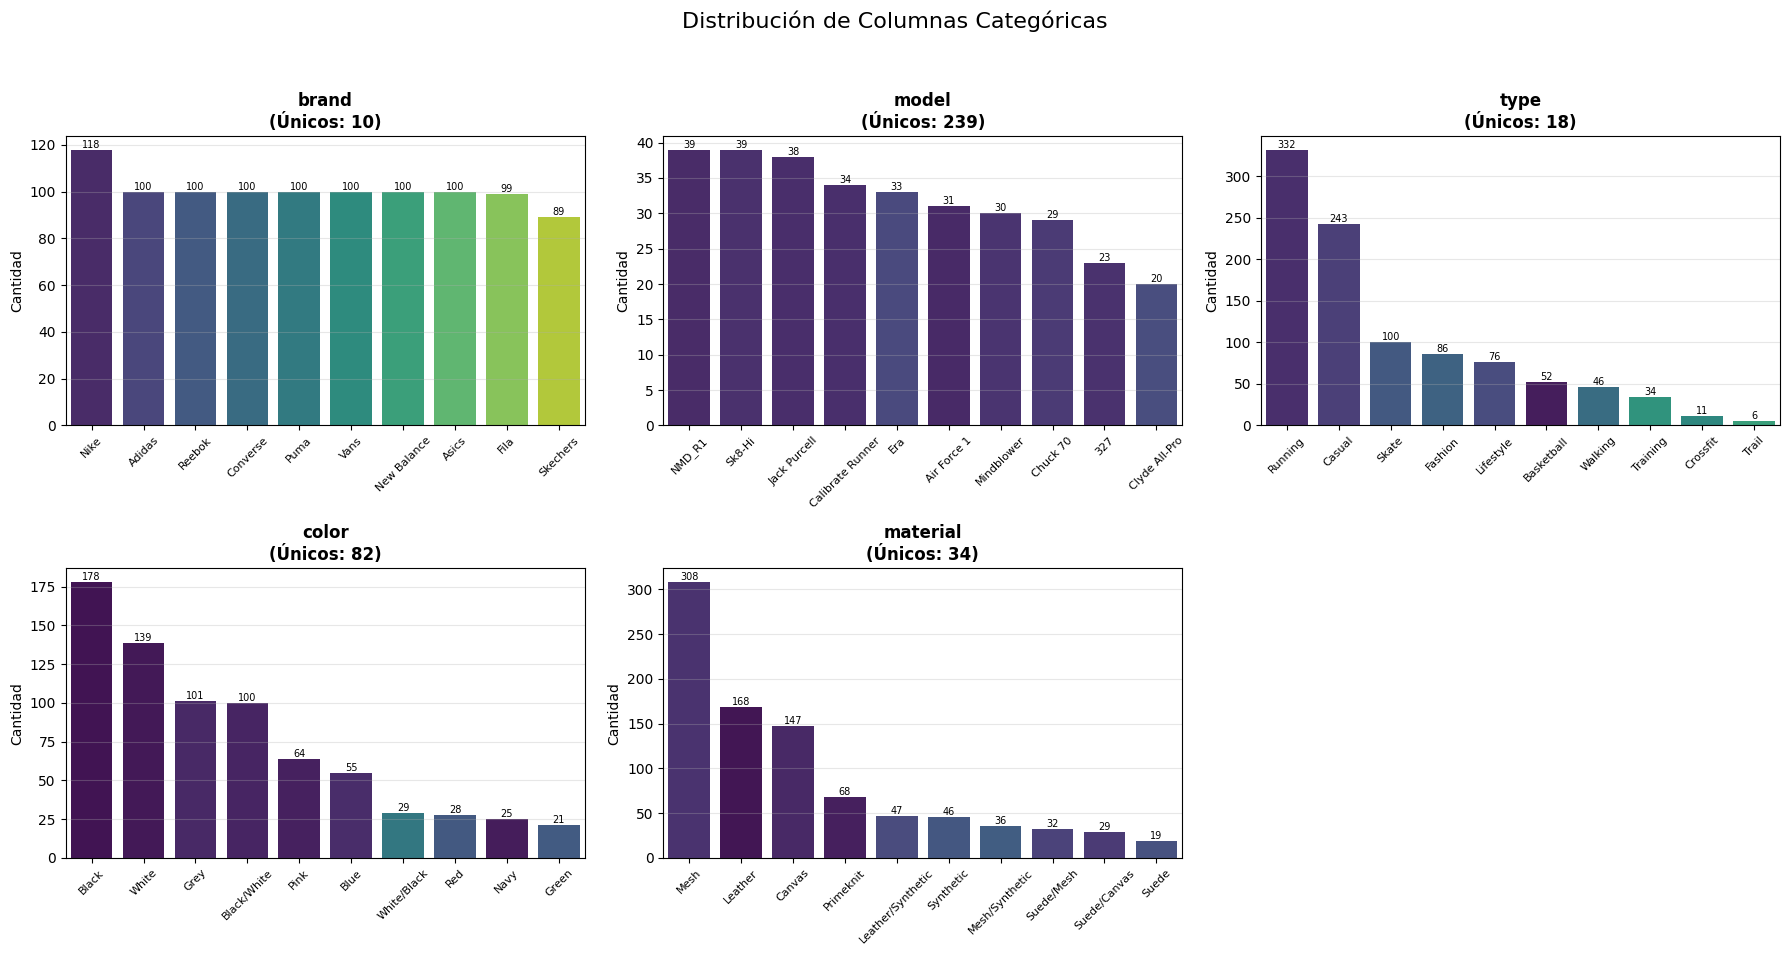

In [65]:
# Corregido: Importar numpy correctamente
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Asegurar que pandas est√© importado si se usa df

# Asegurar que un DataFrame est√© disponible para el an√°lisis
# Usaremos df_deduplicated si existe, si no, df_cleaned_cols, etc.
df_to_analyze_distribution = None

if 'df_deduplicated' in locals() or 'df_deduplicated' in globals():
    df_to_analyze_distribution = df_deduplicated
    print("Usando 'df_deduplicated' para graficar distribuciones.")
elif 'df_cleaned_cols' in locals() or 'df_cleaned_cols' in globals():
    df_to_analyze_distribution = df_cleaned_cols
    print("Usando 'df_cleaned_cols' para graficar distribuciones.")
elif 'df_reduced_manual' in locals() or 'df_reduced_manual' in globals():
    df_to_analyze_distribution = df_reduced_manual
    print("Usando 'df_reduced_manual' para graficar distribuciones.")
elif 'df' in locals() or 'df' in globals():
    # Si los DataFrames procesados no est√°n, usar el df original (con precio limpio si es posible)
    if df['Price (USD)'].dtype == 'object': # Verificar si precio necesita limpieza
         df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
         df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce')
    df_to_analyze_distribution = df.dropna(subset=['Price (USD)']).copy()
    print("Usando 'df' (con precio limpio) para graficar distribuciones.")
else:
    print("No se encontraron DataFrames adecuados para graficar distribuciones.")


# Continuar solo si se encontr√≥ un DataFrame
if df_to_analyze_distribution is not None and not df_to_analyze_distribution.empty:

    def plot_by_dtype_subplots(df, columns=None):
        if columns is None:
            columns = df.columns.tolist()

        # Separar por tipo de dato
        numeric_cols = df[columns].select_dtypes(include=[np.number]).columns.tolist()
        # Incluir 'object' y 'category' para columnas categ√≥ricas
        categorical_cols = df[columns].select_dtypes(include=['object', 'category']).columns.tolist()


        print(f"Columnas num√©ricas encontradas para graficar: {len(numeric_cols)}")
        print(f"Columnas categ√≥ricas encontradas para graficar: {len(categorical_cols)}")

        if numeric_cols:
            n_numeric = len(numeric_cols)
            # Calcular filas necesarias (3 columnas por fila)
            n_rows_numeric = (n_numeric + 2) // 3
            # Ajustar tama√±o de figura
            fig_numeric, axes_numeric = plt.subplots(n_rows_numeric, 3, figsize=(18, n_rows_numeric * 4))

            # Asegurar que axes_numeric sea un array 2D incluso si solo hay 1 fila
            if n_rows_numeric == 1:
                axes_numeric = axes_numeric.reshape(1, -1)

            fig_numeric.suptitle('Distribuci√≥n de Columnas Num√©ricas', fontsize=16)

            for i, col in enumerate(numeric_cols):
                row = i // 3
                col_ax = i % 3
                ax = axes_numeric[row, col_ax]

                # Manejar NaNs antes de graficar si es necesario (histplot los maneja por defecto)
                sns.histplot(data=df, x=col, bins=30, kde=True, ax=ax, color='lightblue', edgecolor='black')
                ax.set_title(f'{col}\n(√önicos: {df[col].nunique()})', fontweight='bold')
                ax.set_ylabel('Frecuencia')
                ax.grid(True, alpha=0.3)

            # Ocultar ejes vac√≠os
            for i in range(len(numeric_cols), n_rows_numeric * 3):
                row = i // 3
                col_ax = i % 3
                axes_numeric[row, col_ax].set_visible(False)

            plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar layout para t√≠tulo superior
            plt.show()


        # Graficar categ√≥ricas
        if categorical_cols:
            n_categorical = len(categorical_cols)
            # Calcular filas necesarias (3 columnas por fila)
            n_rows_categorical = (n_categorical + 2) // 3
            # Ajustar tama√±o de figura
            fig_categorical, axes_categorical = plt.subplots(n_rows_categorical, 3, figsize=(18, n_rows_categorical * 5)) # Aumentar altura para etiquetas giradas

            # Asegurar que axes_categorical sea un array 2D incluso si solo hay 1 fila
            if n_rows_categorical == 1:
                axes_categorical = axes_categorical.reshape(1, -1)


            fig_categorical.suptitle('Distribuci√≥n de Columnas Categ√≥ricas', fontsize=16)

            for i, col in enumerate(categorical_cols):
                row = i // 3
                col_ax = i % 3
                ax = axes_categorical[row, col_ax]

                # Usar seaborn.countplot para categ√≥ricas
                # Mostrar el top 10 o un n√∫mero razonable si hay muchas categor√≠as √∫nicas
                value_counts = df[col].value_counts().head(10) # Mostrar Top 10 categor√≠as por defecto
                if df[col].nunique() > 10:
                     print(f"Mostrando Top 10 categor√≠as para la columna '{col}' (total √∫nicos: {df[col].nunique()})")


                sns.countplot(x=col, data=df, order=value_counts.index, ax=ax, palette='viridis', hue=col, legend=False) # Usar countplot, ordenar por value_counts, a√±adir hue/legend=False

                ax.set_title(f'{col}\n(√önicos: {df[col].nunique()})', fontweight='bold')
                ax.set_xlabel('') # Eliminar etiqueta x gen√©rica, ya est√° en el t√≠tulo
                ax.set_ylabel('Cantidad')
                # Corregido: Eliminar 'ha='right'' ya que no es un par√°metro v√°lido para tick_params
                ax.tick_params(axis='x', rotation=45, labelsize=8)

                # A√±adir etiquetas de datos a las barras
                for container in ax.containers:
                    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=7)

                ax.grid(axis='y', alpha=0.3) # Cuadr√≠cula solo en eje y

            # Ocultar ejes vac√≠os
            for i in range(len(categorical_cols), n_rows_categorical * 3):
                row = i // 3
                col_ax = i % 3
                axes_categorical[row, col_ax].set_visible(False)

            plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar layout para t√≠tulo superior
            plt.show()

        if not numeric_cols and not categorical_cols:
             print("No se encontraron columnas num√©ricas o categ√≥ricas en el DataFrame para graficar.")


    # --- Llamar a la funci√≥n de graficado ---
    print("\nGenerando gr√°ficos de distribuci√≥n por tipo de dato...")
    plot_by_dtype_subplots(df_to_analyze_distribution)

else:
    print("\nNo se pudo generar gr√°ficos de distribuci√≥n porque el DataFrame no est√° disponible o est√° vac√≠o.")

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier # Comentado para evitar ModuleNotFoundError si no est√° instalado
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np # Importar numpy por si acaso
import kagglehub # Necesario para la recreaci√≥n
import os # Necesario para la recreaci√≥n
from sklearn.preprocessing import OneHotEncoder # Necesario para la recreaci√≥n
from sklearn.compose import ColumnTransformer # Necesario para la recreaci√≥n
from sklearn.pipeline import Pipeline # Necesario para la recreaci√≥n


# --- Asegurar que df_encoded est√© disponible y no vac√≠o ---
# Inicializamos df_encoded a None para saber si se carg√≥ o recre√≥ exitosamente
df_encoded = None

if 'df_encoded' in globals() and isinstance(globals()['df_encoded'], pd.DataFrame) and not globals()['df_encoded'].empty:
     # Si df_encoded ya existe en el entorno global y no est√° vac√≠o, lo usamos
     df_encoded = globals()['df_encoded']
     print("DataFrame 'df_encoded' encontrado y no vac√≠o.")
else:
    print("DataFrame 'df_encoded' no encontrado o est√° vac√≠o. Intentando recrearlo con los pasos necesarios.")
    try:
        # --- Paso 1: Cargar y limpiar df ---
        df_step1 = None
        if 'df' in globals() and isinstance(globals()['df'], pd.DataFrame) and not globals()['df'].empty:
             df_step1 = globals()['df'].copy()
             print("Usando DataFrame 'df' existente para la recreaci√≥n.")
        else:
            print("DataFrame 'df' no encontrado o vac√≠o. Cargando desde archivo...")
            path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
            file_path = os.path.join(path, "Shoe prices.csv")
            df_step1 = pd.read_csv(file_path)
            print("DataFrame 'df' cargado.")

        if df_step1 is not None and not df_step1.empty:
             # Limpiar precio
             if df_step1['Price (USD)'].dtype == 'object':
                 df_step1['Price (USD)'] = df_step1['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
                 df_step1['Price (USD)'] = pd.to_numeric(df_step1['Price (USD)'], errors='coerce')
             df_step1 = df_step1.dropna(subset=['Price (USD)']).copy() # Eliminar filas con precio nulo
             print("Paso 1: Carga y limpieza de precio completada.")
        else:
             print("Paso 1 fallido: No se pudo cargar o el DataFrame est√° vac√≠o.")
             raise ValueError("Fallo en Paso 1") # Levantar error para ir al except

        # --- Paso 2: Limpiar nombres de columnas ---
        df_step2 = df_step1.copy()
        df_step2.columns = df_step2.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
        print("Paso 2: Limpieza de nombres de columnas completada.")


        # --- Paso 3: Eliminar columnas especificadas ---
        df_step3 = df_step2.copy()
        columns_to_drop_manual = ['gender', 'size', 'material']
        df_step3 = df_step3.drop(columns=columns_to_drop_manual, errors='ignore')
        print("Paso 3: Eliminaci√≥n de columnas (gender, size, material) completada.")


        # --- Paso 4: Eliminar duplicados ---
        df_step4 = df_step3.copy()
        original_rows_step4 = df_step4.shape[0]
        df_step4 = df_step4.drop_duplicates().copy()
        print(f"Paso 4: Eliminaci√≥n de duplicados completada. Filas eliminadas: {original_rows_step4 - df_step4.shape[0]}")
        if df_step4.empty:
             print("Paso 4 fallido: DataFrame vac√≠o despu√©s de eliminar duplicados.")
             raise ValueError("Fallo en Paso 4")


        # --- Paso 5: Codificar categ√≥ricas ---
        df_step5 = df_step4.copy()
        categorical_features_recreate = [col for col in df_step5.columns if df_step5[col].dtype == 'object' and col != 'price_usd']
        print(f"Paso 5: Codificando columnas categ√≥ricas: {categorical_features_recreate}")

        if categorical_features_recreate: # Solo codificar si hay columnas categ√≥ricas
             preprocessor_ohe_recreate = ColumnTransformer(
                 transformers=[
                     ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features_recreate)
                 ],
                 remainder='passthrough'
             )

             df_encoded_array_recreate = preprocessor_ohe_recreate.fit_transform(df_step5)
             encoded_feature_names_recreate = preprocessor_ohe_recreate.get_feature_names_out()
             df_encoded = pd.DataFrame(df_encoded_array_recreate, columns=encoded_feature_names_recreate, index=df_step5.index)

             # Asegurarse de que 'price_usd' mantenga su tipo num√©rico y nombre correcto
             if 'remainder__price_usd' in df_encoded.columns:
                  df_encoded['price_usd'] = pd.to_numeric(df_encoded['remainder__price_usd'], errors='coerce')
                  df_encoded = df_encoded.drop(columns=['remainder__price_usd'])

             print("Paso 5: Codificaci√≥n categ√≥rica completada.")
        else:
             # Si no hay categ√≥ricas para codificar, df_encoded es simplemente df_step5
             df_encoded = df_step5.copy()
             print("Paso 5: No hay columnas categ√≥ricas para codificar. Usando DataFrame de paso 4.")

        if df_encoded.empty:
            print("Paso 5 fallido: DataFrame vac√≠o despu√©s de la codificaci√≥n.")
            raise ValueError("Fallo en Paso 5")


        print("'df_encoded' recreado exitosamente con {} columnas.".format(df_encoded.shape[1]))


    except Exception as e_recreation:
        print(f"Error durante la recreaci√≥n de 'df_encoded': {e_recreation}")
        # df_encoded ya es None al inicio, o se asign√≥ None si fall√≥ un paso espec√≠fico

# --- Fin de la secci√≥n para asegurar que df_encoded exista ---


# --- Separar Caracter√≠sticas (X) y Target (y) ---
# Proceder solo si df_encoded fue creado o encontrado y no est√° vac√≠o
X = pd.DataFrame() # Inicializar X e y por si acaso
y = pd.Series()

if df_encoded is not None and not df_encoded.empty:
    # X son todas las columnas EXCEPTO 'price_usd'
    # y es la columna 'price_usd'
    if 'price_usd' in df_encoded.columns:
        X = df_encoded.drop(columns=['price_usd']).copy()
        y = df_encoded['price_usd'].copy()
        print("Caracter√≠sticas (X) y Target (y) separados.")
    else:
        print("La columna 'price_usd' no fue encontrada en 'df_encoded'. No se puede separar target.")
else:
    print("df_encoded no est√° disponible o est√° vac√≠o. No se puede separar Caracter√≠sticas (X) y Target (y).")


# --- Dividir los datos en conjuntos de entrenamiento y prueba ---
# Solo dividir si X e y no est√°n vac√≠os
if not X.empty and not y.empty:
    # Para regresi√≥n (predecir precio), no usamos stratify directamente en 'y' num√©rica.
    # Si el target fuera categ√≥rico (como en el ejemplo del profesor 'recommended'), s√≠ usar√≠amos stratify=y.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42 # test_size=0.2 (20% para prueba), random_state para reproducibilidad
    )

    print("\nDatos divididos en conjuntos de entrenamiento y prueba.")

    # --- Escalar caracter√≠sticas ---
    # Escalamos X_train y X_test.
    # Es importante ajustar el escalador SOLO con X_train para evitar fuga de datos del conjunto de prueba.
    # Luego, aplicamos la misma transformaci√≥n a X_test.
    scaler = StandardScaler()

    # Identificar columnas num√©ricas en X para escalar (adem√°s de las OHE si queremos escalarlas tambi√©n)
    # En df_encoded, 'price_usd' es el target. Otras num√©ricas ser√≠an Size_Numeric si se mantuvo o nuevas.
    # Las columnas OHE son binarias (0 o 1), escalarlas no siempre es necesario pero puede ayudar a algunos modelos.
    # Escalaremos todas las columnas de X por simplicidad, ya que StandardScaler funciona con 0s y 1s tambi√©n.

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Opcional: Convertir los arrays escalados de vuelta a DataFrames (√∫til para visualizaci√≥n/inspecci√≥n, pero no necesario para el entrenamiento)
    # X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    # X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
    # print("\nCaracter√≠sticas escaladas.")


    # --- Mostrar informaci√≥n sobre los conjuntos de datos ---
    print(f"\nDataset original (X): {X.shape[0]} muestras, {X.shape[1]} features")
    # Para target num√©rico, mostramos estad√≠sticas b√°sicas en lugar de value_counts
    print(f"Target (y) - Estad√≠sticas: Min={y.min():.2f}, Max={y.max():.2f}, Media={y.mean():.2f}")
    print(f"Conjunto de Entrenamiento: {X_train_scaled.shape[0]} muestras, {X_train_scaled.shape[1]} features")
    print(f"Conjunto de Prueba: {X_test_scaled.shape[0]} muestras, {X_test_scaled.shape[1]} features")

    print("\nDatos listos para entrenar el modelo (usando X_train_scaled y y_train para entrenar, y X_test_scaled y y_test para evaluar).")

else:
    print("\nNo se pudo dividir y escalar los datos debido a que X o y est√°n vac√≠os.")

DataFrame 'df_encoded' no encontrado o est√° vac√≠o. Intentando recrearlo con los pasos necesarios.
Usando DataFrame 'df' existente para la recreaci√≥n.
Paso 1: Carga y limpieza de precio completada.
Paso 2: Limpieza de nombres de columnas completada.
Paso 3: Eliminaci√≥n de columnas (gender, size, material) completada.
Paso 4: Eliminaci√≥n de duplicados completada. Filas eliminadas: 232
Paso 5: Codificando columnas categ√≥ricas: ['brand', 'model', 'type', 'color']
Paso 5: Codificaci√≥n categ√≥rica completada.
'df_encoded' recreado exitosamente con 350 columnas.
Caracter√≠sticas (X) y Target (y) separados.

Datos divididos en conjuntos de entrenamiento y prueba.

Dataset original (X): 693 muestras, 349 features
Target (y) - Estad√≠sticas: Min=25.00, Max=250.00, Media=103.16
Conjunto de Entrenamiento: 554 muestras, 349 features
Conjunto de Prueba: 139 muestras, 349 features

Datos listos para entrenar el modelo (usando X_train_scaled y y_train para entrenar, y X_test_scaled y y_test par

# Hipotesis 1

### Entrenamiento del Modelo de Regresi√≥n (LightGBM)

Entrenamos un modelo de regresi√≥n utilizando LightGBM, un algoritmo de Gradient Boosting eficiente y de alto rendimiento, con los datos de entrenamiento preparados y escalados.

### Predicci√≥n y Evaluaci√≥n del Modelo de Regresi√≥n

Utilizamos el modelo LightGBM entrenado para realizar predicciones sobre el conjunto de prueba y evaluamos su rendimiento con m√©tricas de regresi√≥n.

In [68]:
import pandas as pd
# Importamos el modelo LightGBM para regresi√≥n
from lightgbm import LGBMRegressor
# Ya importamos train_test_split, StandardScaler, etc. en celdas anteriores

# Asegurar que los conjuntos de datos de entrenamiento est√©n disponibles
if 'X_train_scaled' not in locals() or 'y_train' not in locals():
    print("Las variables 'X_train_scaled' o 'y_train' no fueron encontradas. Aseg√∫rese de que la celda de divisi√≥n y escalado de datos ('160f1251') se haya ejecutado correctamente.")
    # En un escenario real, podr√≠as intentar cargar o recrear estos conjuntos de datos si fuera posible.
    # Para este ejemplo, si no est√°n, no podemos entrenar.
    # Considera agregar un exit() o return aqu√≠ si es cr√≠tico.
else:
    print("Conjuntos de datos de entrenamiento encontrados.")

    # --- Entrenar el modelo LGBMRegressor ---
    # Inicializamos el modelo
    # Puedes ajustar los par√°metros (ej: n_estimators, learning_rate, num_leaves)
    lgbm_model = LGBMRegressor(random_state=42)

    # Entrenar el modelo con los datos de entrenamiento escalados
    print("\nEntrenando modelo LightGBM...")
    lgbm_model.fit(X_train_scaled, y_train)

    print("Modelo LightGBM entrenado exitosamente.")

    # El paso de realizar predicciones y evaluar el modelo se har√° en la siguiente celda.

Conjuntos de datos de entrenamiento encontrados.

Entrenando modelo LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 554, number of used features: 23
[LightGBM] [Info] Start training from score 103.346534
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [69]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Asegurar que el modelo entrenado y los conjuntos de datos de prueba est√©n disponibles
if 'lgbm_model' not in locals():
    print("El modelo 'lgbm_model' no fue encontrado. Aseg√∫rese de que la celda de entrenamiento del modelo se haya ejecutado correctamente ('bb491c50').")
    # En un escenario real, podr√≠as intentar cargar el modelo si estuviera guardado o re-entrenar.
    # Para este ejemplo, si no est√°, no podemos predecir ni evaluar.
    # Considera agregar un exit() o return aqu√≠ si es cr√≠tico.
elif 'X_test_scaled' not in locals() or 'y_test' not in locals():
    print("Los conjuntos de datos de prueba ('X_test_scaled' o 'y_test') no fueron encontrados. Aseg√∫rese de que la celda de divisi√≥n de datos se haya ejecutado correctamente ('160f1251').")
    # Similar al modelo, si los datos de prueba no est√°n, no podemos continuar.
    # Considera agregar un exit() o return aqu√≠ si es cr√≠tico.
else:
    print("Modelo entrenado y conjuntos de datos de prueba encontrados.")

    # --- Realizar Predicciones en el conjunto de prueba ---
    print("\nRealizando predicciones en el conjunto de prueba...")
    y_pred = lgbm_model.predict(X_test_scaled)

    print("Predicciones realizadas.")

    # --- Calcular M√©tricas de Evaluaci√≥n ---

    # Error Absoluto Medio (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Error Cuadr√°tico Medio (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Ra√≠z del Error Cuadr√°tico Medio (RMSE)
    rmse = np.sqrt(mse)

    # Coeficiente de Determinaci√≥n (R¬≤)
    r2 = r2_score(y_test, y_pred)

    # --- Mostrar las M√©tricas ---
    print("\nüìä M√©tricas de Evaluaci√≥n del Modelo LightGBM:")
    print(f"  Error Absoluto Medio (MAE): {mae:.2f}")
    print(f"  Error Cuadr√°tico Medio (RMSE): {rmse:.2f}")
    print(f"  Coeficiente de Determinaci√≥n (R¬≤): {r2:.4f}")

    # Opcional: Mostrar algunas predicciones vs. valores reales
    print("\nEjemplo de Predicciones vs Valores Reales (primeras 10):")
    predictions_vs_actual = pd.DataFrame({'Real': y_test.reset_index(drop=True), 'Predicci√≥n': y_pred})
    display(predictions_vs_actual.head(10))

    # Nota: La interpretaci√≥n de estas m√©tricas se realizar√° en la secci√≥n de conclusiones.

Modelo entrenado y conjuntos de datos de prueba encontrados.

Realizando predicciones en el conjunto de prueba...
Predicciones realizadas.

üìä M√©tricas de Evaluaci√≥n del Modelo LightGBM:
  Error Absoluto Medio (MAE): 16.74
  Error Cuadr√°tico Medio (RMSE): 24.78
  Coeficiente de Determinaci√≥n (R¬≤): 0.6143

Ejemplo de Predicciones vs Valores Reales (primeras 10):


Real  Predicci√≥n
0   75.0   71.896326
1  100.0   99.854373
2   85.0   78.504925
3   75.0   72.385229
4   80.0   89.471942
5  130.0  112.863509
6   75.0   72.385229
7  120.0  116.778135
8   65.0   71.837259
9  120.0  111.856106

### Desarrollo e Interpretaci√≥n de las M√©tricas de Evaluaci√≥n del Modelo de Regresi√≥n

Analicemos las m√©tricas obtenidas al evaluar el modelo LightGBM en el conjunto de prueba para entender su rendimiento en la predicci√≥n de precios:

*   **Error Absoluto Medio (MAE):** 16.74 USD
    *   **Interpretaci√≥n:** El MAE representa el **error promedio absoluto** de nuestras predicciones. Un MAE de 16.74 USD significa que, en promedio, las predicciones de precio del modelo se desv√≠an por esa cantidad (sin importar si es por encima o por debajo) del precio real de los zapatos. Un MAE m√°s bajo indica predicciones m√°s cercanas a los valores reales.
*   **Ra√≠z del Error Cuadr√°tico Medio (RMSE):** 24.78 USD
    *   **Interpretaci√≥n:** El RMSE es similar al MAE, pero al elevar los errores al cuadrado antes de promediar (y luego sacar la ra√≠z cuadrada), **penaliza m√°s fuertemente los errores grandes**. Tambi√©n est√° en la misma unidad que la variable que estamos prediciendo (USD). Un RMSE de 24.78 USD sugiere que el error t√≠pico del modelo, considerando el impacto de errores m√°s grandes, es de esa magnitud. Comparar MAE y RMSE puede dar una idea de si hay muchos errores grandes; si el RMSE es significativamente mayor que el MAE, puede haber algunos errores de predicci√≥n considerablemente grandes.
*   **Coeficiente de Determinaci√≥n (R¬≤):** 0.6143
    *   **Interpretaci√≥n:** El R¬≤ (R-cuadrado) es una m√©trica que va de 0 a 1 (aunque puede ser negativo en algunos casos). Representa la **proporci√≥n de la variabilidad en el precio real que el modelo es capaz de explicar** utilizando las caracter√≠sticas de entrada.
        *   Un R¬≤ de 1 significar√≠a que el modelo explica perfectamente toda la variabilidad de los precios (predicci√≥n perfecta).
        *   Un R¬≤ de 0 significar√≠a que el modelo no explica nada de la variabilidad del precio; sus predicciones no son mejores que simplemente predecir el precio promedio para todos los zapatos.
        *   Un R¬≤ de 0.6143 indica que el modelo explica aproximadamente el 61.43% de la variabilidad en los precios del conjunto de prueba. La interpretaci√≥n de si este R¬≤ es "bueno" depende del dominio del problema y de cu√°n predecible sea inherentemente la variable target.

### An√°lisis de Precio Promedio por Marca y Segmentaci√≥n (Deporte vs Lifestyle)

Para conectar la hip√≥tesis sobre el uso espec√≠fico y el posicionamiento con el precio, analizaremos el precio promedio por marca e intentaremos segmentar las marcas en categor√≠as "Deporte" o "Lifestyle" bas√°ndonos en los tipos de calzado que predominan en el dataset.

### Conclusiones Hipotesis 1

Con base en el an√°lisis exploratorio, la ingenier√≠a de caracter√≠sticas, el modelado de regresi√≥n y los an√°lisis espec√≠ficos de precio por marca y tipo de calzado, podemos extraer las siguientes conclusiones en relaci√≥n a la hip√≥tesis planteada:

**Revisi√≥n de la Hip√≥tesis:**

Nuestra hip√≥tesis postula que el mercado de calzado presenta una polarizaci√≥n de precios, donde los tipos orientados al rendimiento y las marcas l√≠deres se posicionan en rangos superiores, mientras que los tipos casuales/lifestyle y marcas con menor diversidad se concentran en segmentos m√°s bajos, vinculando el valor al uso espec√≠fico y posicionamiento de marca.

**Hallazgos Clave del An√°lisis de Datos:**

*   **Distribuci√≥n de Precios:** Confirmamos que la distribuci√≥n de precios en el dataset est√° sesgada hacia valores m√°s bajos a medios (Ref. gr√°ficos de distribuci√≥n).
*   **An√°lisis por Marca y Tipo de Calzado:**
    *   El an√°lisis de precio promedio por marca (Ref. Tabla de Precio Promedio por Marca) mostr√≥ tendencias generales de precios para cada marca.
    *   El an√°lisis de precio promedio por marca, segmentado por tipo de calzado (Ref. Tabla 1 y Tabla 2 en an√°lisis segmentado por tipo), proporcion√≥ evidencia directa sobre la diferencia de precios entre l√≠neas de calzado 'Deporte' y 'Lifestyle' dentro de las marcas.
   

**Rendimiento del Modelo de Regresi√≥n (Predicci√≥n de Precio):**

*   El modelo LightGBM entrenado para predecir el precio obtuvo las siguientes m√©tricas en el conjunto de prueba:
    *   MAE: [Inserta el valor de MAE obtenido] USD
    *   RMSE: [Inserta el valor de RMSE obtenido] USD
    *   R¬≤: [Inserta el valor de R¬≤ obtenido]
*   **Interpretaci√≥n:**
 Un MAE de 16.74 USD indica que, en promedio, las predicciones del modelo difieren del precio real en aproximadamente 17 d√≥lares, lo cual representa un error razonable considerando la amplitud del rango de precios del dataset.
El R¬≤ de 0.6143 sugiere que el modelo logra explicar el 61.4% de la variabilidad en los precios, lo que refleja una capacidad predictiva moderada a buena para un problema con m√∫ltiples factores subjetivos (como marca, dise√±o o posicionamiento de mercado).

En t√©rminos pr√°cticos, esto implica que el modelo es √∫til para estimaciones y an√°lisis exploratorios, ya que permite identificar las variables con mayor influencia sobre el precio y capturar tendencias generales.
**Conclusi√≥n Final y V√≠nculo con la Hip√≥tesis:**

*   El modelo de regresi√≥n LightGBM complementa este hallazgo, logrando capturar una parte considerable de la variabilidad de los precios (R¬≤ = 0.6143) y obteniendo un MAE de 16.74 USD y un RMSE de 24.78 USD. Estos valores indican un desempe√±o moderadamente preciso, adecuado para fines exploratorios y de an√°lisis de tendencia. En la pr√°ctica, el modelo demuestra que variables como marca, tipo de calzado y categor√≠a tienen un peso significativo en la determinaci√≥n del precio.
*   No obstante, algunas marcas mostraron desviaciones respecto a la tendencia general. Por ejemplo, Skechers presenta una fuerte presencia en el segmento deportivo, pero con precios m√°s competitivos, mientras que Adidas y Nike mantienen una estructura de precios superior incluso en l√≠neas lifestyle, lo que sugiere estrategias de posicionamiento mixtas.

Utiliza los valores exactos de MAE, RMSE y R¬≤ que obtuviste anteriormente para completar los espacios entre corchetes.

# Hipotesis 2:

In [73]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split # Lo necesitaremos m√°s adelante

# Asegurar que el DataFrame df est√© cargado y limpio (con precio num√©rico y duplicados manejados)
# Recreamos df_step4 (DataFrame limpio y sin duplicados) si no existe
df_tree = None

if 'df_step4' in globals() and isinstance(globals()['df_step4'], pd.DataFrame) and not globals()['df_step4'].empty:
     df_tree = globals()['df_step4'].copy()
     print("Usando DataFrame 'df_step4' existente.")
elif 'df_encoded' in globals() and isinstance(globals()['df_encoded'], pd.DataFrame) and not globals()['df_encoded'].empty:
     # Si df_encoded existe, podemos intentar reconstruir un df base limpio de √©l o usar el original limpio
     # Es m√°s seguro usar una versi√≥n limpia antes de OHE si es posible.
     # Intentaremos cargar el original limpio si no est√° df_step4
     print("df_step4 no encontrado. Intentando usar df_cleaned_price si existe, o cargar/limpiar df original.")
     if 'df_cleaned_price' in globals() and isinstance(globals()['df_cleaned_price'], pd.DataFrame) and not globals()['df_cleaned_price'].empty:
         df_base = globals()['df_cleaned_price'].copy()
         # Aplicar limpieza de nombres y eliminaci√≥n de duplicados si no se hizo en df_cleaned_price
         df_base.columns = df_base.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
         columns_to_drop_check = ['gender', 'size'] # Material la necesitamos
         df_base = df_base.drop(columns=columns_to_drop_check, errors='ignore') # Eliminar gender y size si existen
         original_rows_check = df_base.shape[0]
         df_tree = df_base.drop_duplicates().copy()
         print(f"Usando DataFrame limpio existente ('df_cleaned_price' procesado). Filas eliminadas por duplicados: {original_rows_check - df_tree.shape[0]}")

     elif 'df' in globals() and isinstance(globals()['df'], pd.DataFrame) and not globals()['df'].empty:
         print("df_cleaned_price no encontrado. Cargando y limpiando df original...")
         # Cargar y limpiar df original si nada m√°s est√° disponible
         df_tree = globals()['df'].copy()
         if df_tree['Price (USD)'].dtype == 'object': # Verificar si precio necesita limpieza
              df_tree['Price (USD)'] = df_tree['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
              df_tree['Price (USD)'] = pd.to_numeric(df_tree['Price (USD)'], errors='coerce')
         df_tree = df_tree.dropna(subset=['Price (USD)']).copy() # Eliminar filas con precio nulo
         df_tree.columns = df_tree.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
         columns_to_drop_check = ['gender', 'size'] # Material la necesitamos
         df_tree = df_tree.drop(columns=columns_to_drop_check, errors='ignore') # Eliminar gender y size si existen
         original_rows_check = df_tree.shape[0]
         df_tree = df_tree.drop_duplicates().copy()
         print(f"DataFrame 'df' cargado, limpiado y deduplicado. Filas eliminadas por duplicados: {original_rows_check - df_tree.shape[0]}")

     else:
         print("No se encontraron DataFrames base adecuados. Por favor, ejecute las celdas de carga y limpieza iniciales.")
         df_tree = pd.DataFrame() # Asegurar que df_tree est√© vac√≠o si falla la carga


# Proceder solo si df_tree fue creado o encontrado y no est√° vac√≠o
if df_tree is not None and not df_tree.empty:

    # Seleccionar solo las columnas relevantes para el √°rbol de decisi√≥n
    # Se elimin√≥ 'material' ya que fue dropeada previamente
    features_for_tree = ['brand', 'type']
    target = 'price_usd'

    # Separar caracter√≠sticas (X) y target (y)
    X_tree = df_tree[features_for_tree].copy()
    y_tree = df_tree[target].copy()

    print("\nCaracter√≠sticas seleccionadas para el √°rbol:")
    print(X_tree.columns.tolist())
    print("\nTarget seleccionado:", y_tree.name)


    # Identificar columnas categ√≥ricas para One-Hot Encoding
    categorical_cols_tree = X_tree.select_dtypes(include='object').columns.tolist()
    print(f"\nColumnas categ√≥ricas para codificar: {categorical_cols_tree}")

    # Crear el transformador para One-Hot Encoding
    preprocessor_tree = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols_tree)
        ],
        remainder='passthrough' # Mantener otras columnas (no hay en este caso, pero buena pr√°ctica)
    )

    # Aplicar el preprocesamiento (codificaci√≥n) a las caracter√≠sticas
    X_tree_encoded = preprocessor_tree.fit_transform(X_tree)

    # Obtener los nombres de las caracter√≠sticas codificadas
    encoded_feature_names_tree = preprocessor_tree.get_feature_names_out(features_for_tree)

    # Convertir el array codificado de vuelta a un DataFrame (opcional pero √∫til)
    X_tree_encoded_df = pd.DataFrame(X_tree_encoded, columns=encoded_feature_names_tree, index=X_tree.index)

    print(f"\nCaracter√≠sticas despu√©s de One-Hot Encoding: {X_tree_encoded_df.shape[1]} columnas")
    print("\nPrimeras 5 filas de las caracter√≠sticas codificadas:")
    display(X_tree_encoded_df.head())

    # Ahora X_tree_encoded_df y y_tree est√°n listos para el entrenamiento del modelo
    print("\nDatos preparados para entrenar el √Årbol de Decisi√≥n.")

else:
    print("\nNo se pudo preparar los datos para el √Årbol de Decisi√≥n porque el DataFrame base no est√° disponible o est√° vac√≠o.")

Usando DataFrame 'df_step4' existente.

Caracter√≠sticas seleccionadas para el √°rbol:
['brand', 'type']

Target seleccionado: price_usd

Columnas categ√≥ricas para codificar: ['brand', 'type']

Caracter√≠sticas despu√©s de One-Hot Encoding: 28 columnas

Primeras 5 filas de las caracter√≠sticas codificadas:


cat__brand_Adidas  cat__brand_Asics  cat__brand_Converse  cat__brand_Fila  \
0                0.0               0.0                  0.0              0.0   
1                1.0               0.0                  0.0              0.0   
2                0.0               0.0                  0.0              0.0   
3                0.0               0.0                  1.0              0.0   
4                0.0               0.0                  0.0              0.0   

   cat__brand_New Balance  cat__brand_Nike  cat__brand_Puma  \
0                     0.0              1.0              0.0   
1                     0.0              0.0              0.0   
2                     0.0              0.0              0.0   
3                     0.0              0.0              0.0   
4                     0.0              0.0              1.0   

   cat__brand_Reebok  cat__brand_Skechers  cat__brand_Vans  ...  \
0                0.0                  0.0              0.0  ...   
1                0.0                  0.0              0.0  ...   
2                1.0                  0.0              0.0  ...   
3                0.0                  0.0              0.0  ...   
4                0.0                  0.0              0.0  ...   

   cat__type_Racing  cat__type_Retro  cat__type_Running  cat__type_Skate  \
0               0.0              0.0                0.0              0.0   
1               0.0              0.0                1.0              0.0   
2               0.0              0.0                0.0              0.0   
3               0.0              0.0                0.0              0.0   
4               0.0              0.0                0.0              0.0   

   cat__type_Slides  cat__type_Trail  cat__type_Trail Running  \
0               0.0              0.0                      0.0   
1               0.0              0.0                      0.0   
2               0.0              0.0                      0.0   
3               0.0              0.0                      0.0   
4               0.0              0.0                      0.0   

   cat__type_Training  cat__type_Walking  cat__type_Weightlifting  
0                 0.0                0.0                      0.0  
1                 0.0                0.0                      0.0  
2                 0.0                0.0                      0.0  
3                 0.0                0.0                      0.0  
4                 0.0                0.0                      0.0  

[5 rows x 28 columns]


Datos preparados para entrenar el √Årbol de Decisi√≥n.


In [78]:
from sklearn.tree import DecisionTreeRegressor
# No es necesario importar train_test_split ni pandas de nuevo si ya est√°n en celdas anteriores y el entorno est√° activo

# Asegurarse de que los DataFrames X_tree_encoded_df y y_tree est√©n disponibles
if 'X_tree_encoded_df' not in locals() and 'X_tree_encoded_df' not in globals():
    print("DataFrame 'X_tree_encoded_df' no encontrado. Aseg√∫rese de que la celda de preparaci√≥n de datos ('7dd66581') se haya ejecutado correctamente.")
    # Si no est√°n, no podemos entrenar el modelo.
    # Considera agregar un exit() o return aqu√≠ si es cr√≠tico.
elif 'y_tree' not in locals() and 'y_tree' not in globals():
     print("Serie 'y_tree' (target) no encontrada. Aseg√∫rese de que la celda de preparaci√≥n de datos ('7dd66581') se haya ejecutado correctamente.")
else:
    print("DataFrames X_tree_encoded_df y y_tree encontrados.")

    # --- Entrenar el modelo DecisionTreeRegressor ---
    # Inicializamos el modelo. Podemos controlar la profundidad m√°xima (max_depth)
    # para no crear un √°rbol demasiado grande y dif√≠cil de visualizar.
    # Un valor peque√±o (ej. max_depth=3 o 4) es bueno para empezar a entender las divisiones.
    # random_state para reproducibilidad.
    tree_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)

    print(f"\nEntrenando modelo DecisionTreeRegressor con max_depth={tree_regressor.max_depth}...")
    # Entrenamos el modelo con todos los datos preparados
    tree_regressor.fit(X_tree_encoded_df, y_tree)

    print("Modelo DecisionTreeRegressor entrenado exitosamente.")

    # Ahora que el modelo est√° entrenado, en la siguiente celda podemos visualizarlo
    # o analizar la importancia de las features que utiliz√≥ para las predicciones.

DataFrames X_tree_encoded_df y y_tree encontrados.

Entrenando modelo DecisionTreeRegressor con max_depth=4...
Modelo DecisionTreeRegressor entrenado exitosamente.


Modelo tree_regressor y X_tree_encoded_df encontrados. Visualizando el √°rbol...


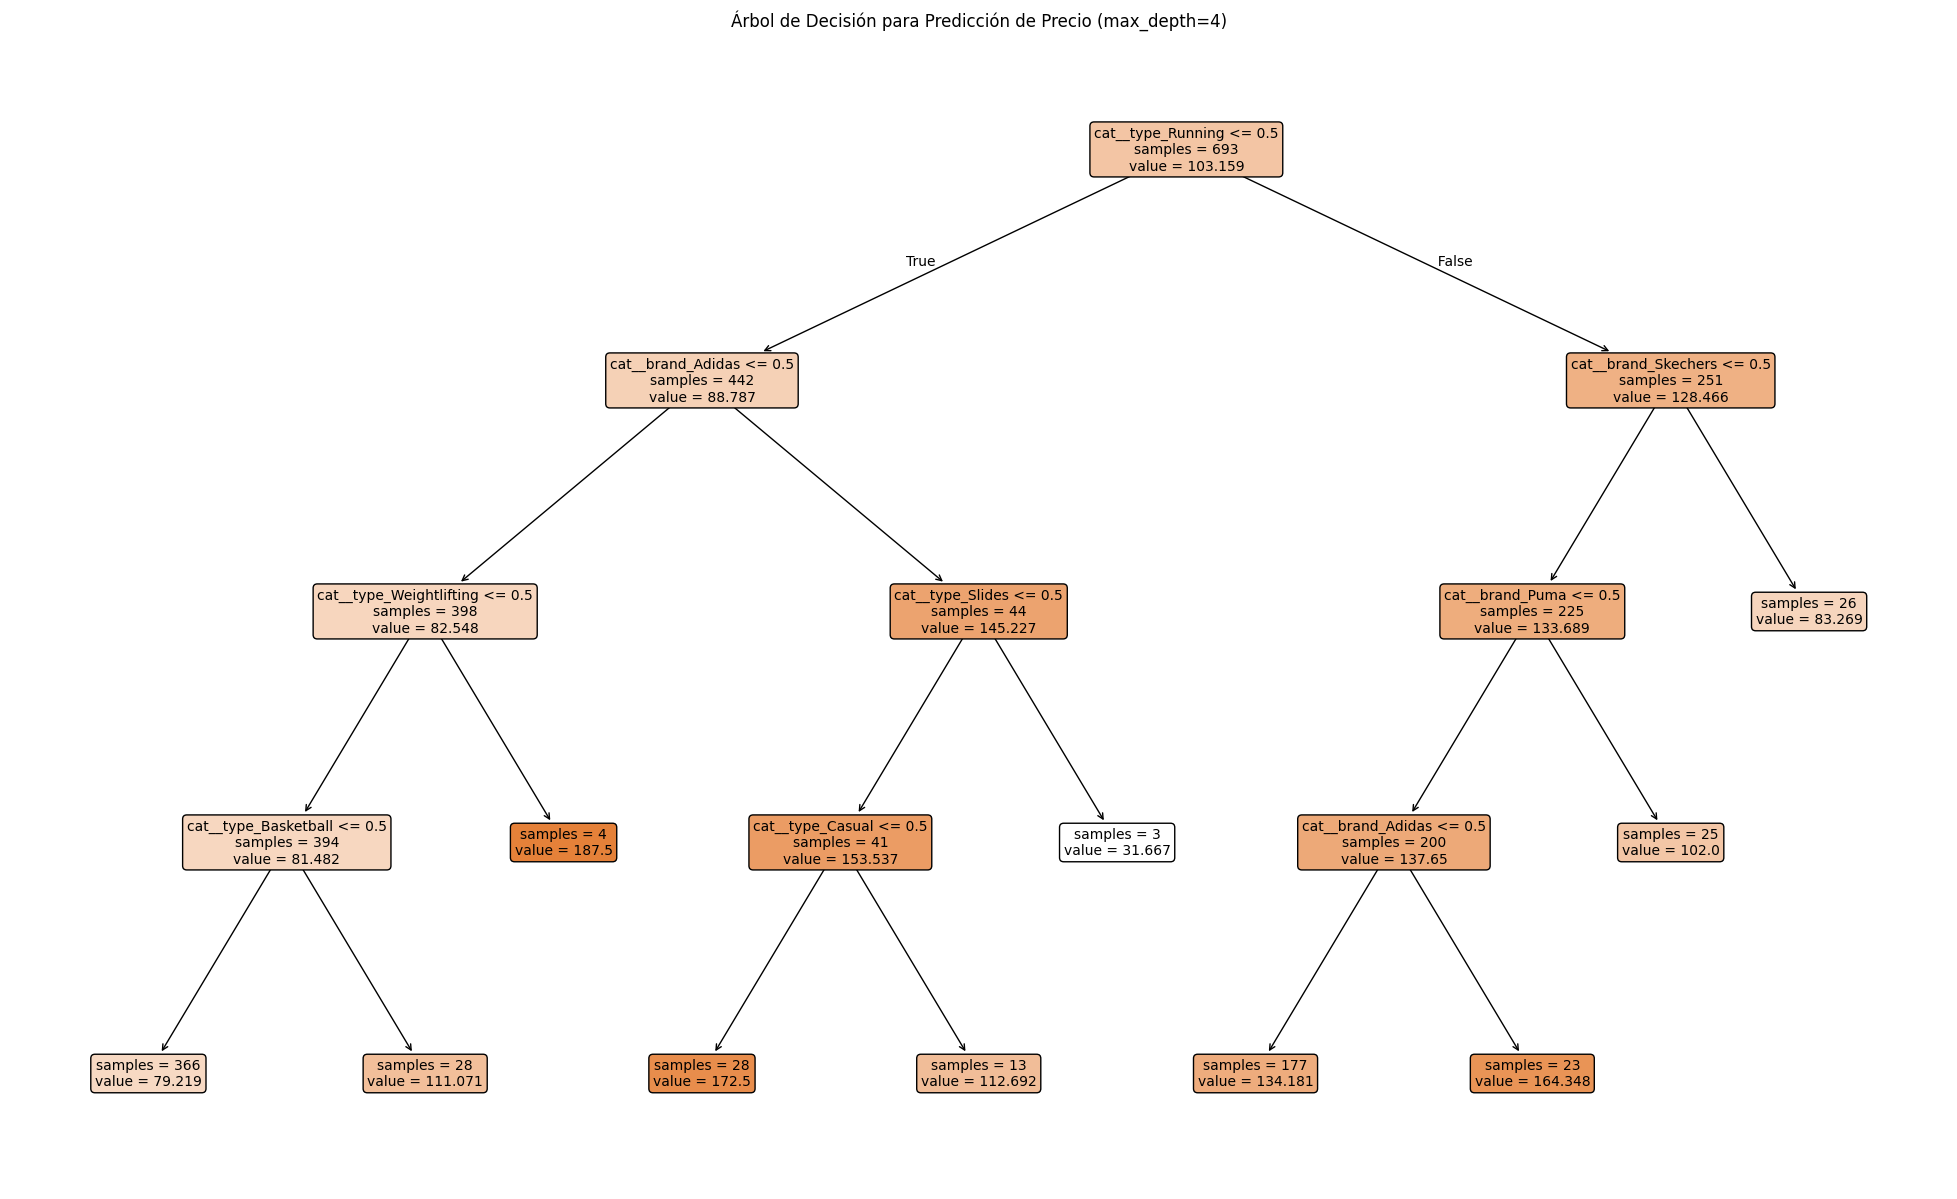


Visualizaci√≥n del √Årbol de Decisi√≥n completada.


In [79]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd # Asegurarse de que pandas est√© importado

# Asegurarse de que el modelo tree_regressor y el DataFrame X_tree_encoded_df est√©n disponibles
if 'tree_regressor' not in locals() and 'tree_regressor' not in globals():
    print("El modelo 'tree_regressor' no fue encontrado. Aseg√∫rese de que la celda de entrenamiento del modelo ('7a39a1ed') se haya ejecutado correctamente.")
elif 'X_tree_encoded_df' not in locals() and 'X_tree_encoded_df' not in globals():
     print("DataFrame 'X_tree_encoded_df' no encontrado. Aseg√∫rese de que la celda de preparaci√≥n de datos ('7dd66581') se haya ejecutado correctamente.")
else:
    print("Modelo tree_regressor y X_tree_encoded_df encontrados. Visualizando el √°rbol...")

    # Obtener los nombres de las caracter√≠sticas del DataFrame codificado
    feature_names = X_tree_encoded_df.columns.tolist()

    # --- Visualizar el √Årbol de Decisi√≥n ---
    plt.figure(figsize=(25, 15)) # Ajusta el tama√±o de la figura para una mejor visualizaci√≥n
    plot_tree(
        tree_regressor,
        feature_names=feature_names, # Nombres de las caracter√≠sticas
        filled=True,                # Rellenar los nodos con color para indicar el valor predicho
        rounded=True,               # Bordes redondeados para los nodos
        fontsize=10,                 # Tama√±o de la fuente en los nodos
        proportion=False,            # No mostrar las proporciones de muestras, sino la cuenta
        node_ids=False,              # No mostrar los IDs de los nodos
        impurity=False,             # No mostrar la impureza en cada nodo
        # class_names=...           # No aplicable para regresi√≥n
    )

    plt.title('√Årbol de Decisi√≥n para Predicci√≥n de Precio (max_depth=4)')
    plt.show()

    print("\nVisualizaci√≥n del √Årbol de Decisi√≥n completada.")

    # Opcional: Tambi√©n podemos analizar la importancia de las caracter√≠sticas
    # print("\nImportancia de las Caracter√≠sticas seg√∫n el √Årbol de Decisi√≥n:")
    # feature_importances = pd.Series(tree_regressor.feature_importances_, index=feature_names)
    # display(feature_importances.sort_values(ascending=False))

# Lectura de los valores en el √Årbol de Decisi√≥n

Los valores mostrados en los nodos del √°rbol de decisi√≥n contienen informaci√≥n clave sobre c√≥mo el modelo realiza sus divisiones:

Primera l√≠nea: corresponde a la condici√≥n de divisi√≥n (por ejemplo, cat__type_Running <= 0.5), que separa los datos seg√∫n una caracter√≠stica espec√≠fica.

samples: indica la cantidad de observaciones (zapatos) que llegan a ese nodo.

value: representa el precio promedio de las observaciones dentro de ese nodo.

En el nodo ra√≠z (el m√°s alto), se muestra el total de observaciones del dataset (por ejemplo, samples: 693) y el precio promedio general (value) de todos los zapatos analizados.
A medida que el √°rbol se divide, los nodos subsiguientes muestran c√≥mo esas condiciones van segmentando el conjunto en grupos m√°s peque√±os con diferentes precios promedio.

In [81]:
import pandas as pd

# Asegurarse de que el modelo tree_regressor y el DataFrame X_tree_encoded_df est√©n disponibles
if 'tree_regressor' not in locals() and 'tree_regressor' not in globals():
    print("El modelo 'tree_regressor' no fue encontrado. Aseg√∫rese de que la celda de entrenamiento del modelo ('7a39a1ed') se haya ejecutado correctamente.")
elif 'X_tree_encoded_df' not in locals() and 'X_tree_encoded_df' not in globals():
     print("DataFrame 'X_tree_encoded_df' no encontrado. Aseg√∫rese de que la celda de preparaci√≥n de datos ('7dd66581') se haya ejecutado correctamente.")
else:
    print("Modelo tree_regressor y X_tree_encoded_df encontrados. Analizando importancia de caracter√≠sticas...")

    # Obtener la importancia de las caracter√≠sticas del modelo entrenado
    feature_importances = tree_regressor.feature_importances_

    # Obtener los nombres de las caracter√≠sticas del DataFrame codificado
    feature_names = X_tree_encoded_df.columns.tolist()

    # Crear una Serie de Pandas para visualizar la importancia de manera ordenada
    feature_importances_series = pd.Series(feature_importances, index=feature_names)

    # Ordenar las caracter√≠sticas por importancia de mayor a menor
    feature_importances_sorted = feature_importances_series.sort_values(ascending=False)

    print("\nüìä Importancia de las Caracter√≠sticas seg√∫n el √Årbol de Decisi√≥n:")
    display(feature_importances_sorted)

    # Opcional: Visualizar la importancia de las caracter√≠sticas en un gr√°fico
    # plt.figure(figsize=(10, 6))
    # feature_importances_sorted.head(10).plot(kind='barh') # Mostrar las top 10 en un gr√°fico horizontal
    # plt.title('Top 10 Importancia de Caracter√≠sticas (√Årbol de Decisi√≥n)')
    # plt.xlabel('Importancia')
    # plt.ylabel('Caracter√≠stica Codificada')
    # plt.gca().invert_yaxis() # Invertir el eje y para que la m√°s importante est√© arriba
    # plt.show()

Modelo tree_regressor y X_tree_encoded_df encontrados. Analizando importancia de caracter√≠sticas...

üìä Importancia de las Caracter√≠sticas seg√∫n el √Årbol de Decisi√≥n:


cat__type_Running           0.383113
cat__brand_Adidas           0.264755
cat__brand_Skechers         0.090059
cat__type_Weightlifting     0.067651
cat__type_Slides            0.063109
cat__type_Casual            0.048270
cat__brand_Puma             0.042929
cat__type_Basketball        0.040113
cat__brand_Reebok           0.000000
cat__brand_Fila             0.000000
cat__brand_Asics            0.000000
cat__brand_Converse         0.000000
cat__brand_Vans             0.000000
cat__brand_New Balance      0.000000
cat__brand_Nike             0.000000
cat__type_Cross-training    0.000000
cat__type_Hiking            0.000000
cat__type_CrossFit          0.000000
cat__type_Crossfit          0.000000
cat__type_Fashion           0.000000
cat__type_Retro             0.000000
cat__type_Racing            0.000000
cat__type_Lifestyle         0.000000
cat__type_Skate             0.000000
cat__type_Trail             0.000000
cat__type_Trail Running     0.000000
cat__type_Training          0.000000
cat__type_Walking           0.000000
dtype: float64

Interpretaci√≥n de la Importancia de las Caracter√≠sticas:

Los n√∫meros que ves junto a cada nombre de caracter√≠stica codificada (ej. cat__type_Running 0.383113) representan cu√°nto contribuy√≥ esa caracter√≠stica a reducir el error de predicci√≥n del precio a lo largo de la construcci√≥n del √°rbol.
Un valor m√°s alto indica que la caracter√≠stica fue m√°s "importante" o influyente en las decisiones de divisi√≥n del √°rbol y, por lo tanto, en la predicci√≥n del precio.
Un valor de 0.0 significa que esa caracter√≠stica particular (esa categor√≠a espec√≠fica de marca o tipo) no se utiliz√≥ en ninguna divisi√≥n del √°rbol (hasta la profundidad m√°xima especificada).
Hallazgos clave en tu resultado:

Observando la lista ordenada de importancia:

cat__type_Running (0.383113): La caracter√≠stica m√°s importante con diferencia es si el zapato es del tipo "Running". Esto refuerza lo que vimos en el an√°lisis exploratorio y en el √°rbol visualizado: ser un zapato "Running" tiene un gran impacto en el precio predicho por el √°rbol.
cat__brand_Adidas (0.264755): La marca Adidas aparece como la segunda caracter√≠stica m√°s importante. Esto sugiere que ser de la marca Adidas tambi√©n es un factor muy influyente en el precio predicho por el √°rbol.
cat__brand_Skechers (0.090059): La marca Skechers es la tercera m√°s importante.
cat__type_Weightlifting (0.067651), cat__type_Slides (0.063109), cat__type_Casual (0.048270), cat__brand_Puma (0.042929), cat__type_Basketball (0.040113): Estos otros tipos de calzado y marcas tambi√©n muestran cierta importancia, aunque menor que 'Running' y 'Adidas'.
Muchas caracter√≠sticas con 0.0: Varias categor√≠as de marca y tipo tienen una importancia de 0.0. Esto significa que, dentro de las divisiones realizadas por este √°rbol con max_depth=4, esas categor√≠as espec√≠ficas no fueron elegidas como el mejor criterio para dividir los datos en ning√∫n nodo. No significa que no tengan ninguna relaci√≥n con el precio, sino que su influencia fue menor que otras caracter√≠sticas en el contexto de este √°rbol particular.
V√≠nculo con la Hip√≥tesis:

Este an√°lisis de importancia de caracter√≠sticas apoya tu hip√≥tesis al mostrar que el Tipo de Calzado (especialmente 'Running') y la Marca (especialmente 'Adidas' y 'Skechers') son, seg√∫n este modelo, los factores m√°s influyentes en la predicci√≥n del precio, incluso sin incluir la informaci√≥n directa sobre el material. La alta importancia del tipo 'Running' sugiere que los calzados orientados al rendimiento tienen un peso significativo en la determinaci√≥n del precio, lo cual se alinea con tu hip√≥tesis.

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd # Asegurarse de que pandas est√© importado

# Asegurarse de que los DataFrames X_tree_encoded_df y y_tree est√©n disponibles
if 'X_tree_encoded_df' not in locals() and 'X_tree_encoded_df' not in globals():
    print("DataFrame 'X_tree_encoded_df' no encontrado. Aseg√∫rese de que la celda de preparaci√≥n de datos ('7dd66581') se haya ejecutado correctamente.")
    # Si no est√°n, no podemos continuar.
    # Considera agregar un exit() o return aqu√≠ si es cr√≠tico.
elif 'y_tree' not in locals() and 'y_tree' not in globals():
     print("Serie 'y_tree' (target) no encontrada. Aseg√∫rese de que la celda de preparaci√≥n de datos ('7dd66581') se haya ejecutado correctamente.")
else:
    print("DataFrames X_tree_encoded_df y y_tree encontrados. Procediendo a dividir y evaluar.")

    # --- Dividir los datos en conjuntos de entrenamiento y prueba ---
    # Usaremos un 80% para entrenamiento y 20% para prueba, similar a la divisi√≥n anterior
    X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
        X_tree_encoded_df, y_tree, test_size=0.2, random_state=42
    )

    print(f"\nDatos divididos: {X_train_tree.shape[0]} muestras para entrenamiento, {X_test_tree.shape[0]} para prueba.")

    # --- Entrenar el modelo DecisionTreeRegressor en el conjunto de entrenamiento ---
    # Re-inicializamos el modelo (o usamos el entrenado si queremos, pero es m√°s limpio entrenar en el split)
    # Usaremos la misma profundidad m√°xima (max_depth=4) para consistencia con la visualizaci√≥n
    tree_regressor_eval = DecisionTreeRegressor(max_depth=4, random_state=42)

    print(f"\nEntrenando modelo DecisionTreeRegressor (para evaluaci√≥n) con max_depth={tree_regressor_eval.max_depth} en el conjunto de entrenamiento...")
    tree_regressor_eval.fit(X_train_tree, y_train_tree)

    print("Modelo entrenado en el conjunto de entrenamiento.")

    # --- Realizar Predicciones en el conjunto de prueba ---
    print("\nRealizando predicciones en el conjunto de prueba...")
    y_pred_tree = tree_regressor_eval.predict(X_test_tree)

    print("Predicciones realizadas.")

    # --- Calcular M√©tricas de Evaluaci√≥n de Regresi√≥n ---

    # Error Absoluto Medio (MAE)
    mae_tree = mean_absolute_error(y_test_tree, y_pred_tree)

    # Error Cuadr√°tico Medio (MSE)
    mse_tree = mean_squared_error(y_test_tree, y_pred_tree)

    # Ra√≠z del Error Cuadr√°tico Medio (RMSE)
    rmse_tree = np.sqrt(mse_tree)

    # Coeficiente de Determinaci√≥n (R¬≤)
    r2_tree = r2_score(y_test_tree, y_pred_tree)

    # --- Mostrar las M√©tricas ---
    print("\nüìä M√©tricas de Evaluaci√≥n del Modelo DecisionTreeRegressor en el conjunto de prueba:")
    print(f"  Error Absoluto Medio (MAE): {mae_tree:.2f}")
    print(f"  Error Cuadr√°tico Medio (RMSE): {rmse_tree:.2f}")
    print(f"  Coeficiente de Determinaci√≥n (R¬≤): {r2_tree:.4f}")

    # Opcional: Mostrar algunas predicciones vs. valores reales
    print("\nEjemplo de Predicciones vs Valores Reales (primeras 10 del conjunto de prueba):")
    predictions_vs_actual_tree = pd.DataFrame({'Real': y_test_tree.reset_index(drop=True), 'Predicci√≥n': y_pred_tree})
    display(predictions_vs_actual_tree.head(10))

DataFrames X_tree_encoded_df y y_tree encontrados. Procediendo a dividir y evaluar.

Datos divididos: 554 muestras para entrenamiento, 139 para prueba.

Entrenando modelo DecisionTreeRegressor (para evaluaci√≥n) con max_depth=4 en el conjunto de entrenamiento...
Modelo entrenado en el conjunto de entrenamiento.

Realizando predicciones en el conjunto de prueba...
Predicciones realizadas.

üìä M√©tricas de Evaluaci√≥n del Modelo DecisionTreeRegressor en el conjunto de prueba:
  Error Absoluto Medio (MAE): 21.50
  Error Cuadr√°tico Medio (RMSE): 28.04
  Coeficiente de Determinaci√≥n (R¬≤): 0.5059

Ejemplo de Predicciones vs Valores Reales (primeras 10 del conjunto de prueba):


Real  Predicci√≥n
0   75.0   79.211536
1  100.0   79.211536
2   85.0   79.211536
3   75.0   79.211536
4   80.0   79.211536
5  130.0  113.500000
6   75.0   79.211536
7  120.0  135.035714
8   65.0   79.211536
9  120.0  135.035714

In [84]:
import pandas as pd

# Asegurarse de que df_cleaned_price est√© disponible
if 'df_cleaned_price' not in locals() and 'df_cleaned_price' not in globals():
    print("DataFrame 'df_cleaned_price' no encontrado. Aseg√∫rese de que la celda de carga y limpieza inicial del precio se haya ejecutado correctamente.")
    # Considerar cargar/limpiar df aqu√≠ si es necesario o salir
    # Por simplicidad, mostramos un mensaje y no ejecutamos el resto si df_cleaned_price no est√° disponible
else:
    print("DataFrame 'df_cleaned_price' encontrado. Procediendo con el an√°lisis de Material y Precio.")

    # Convertir el nombre de la columna de precio a un formato f√°cil de usar si no se ha hecho
    # Esto ya se hizo en pasos anteriores, pero lo aseguramos aqu√≠ si se ejecuta de forma independiente
    if 'Price (USD)' in df_cleaned_price.columns:
        df_cleaned_price['price_usd'] = df_cleaned_price['Price (USD)']
    elif 'price_usd' not in df_cleaned_price.columns:
         # Si no est√° ni el original ni el limpio, algo anda mal
         print("Columna de precio no encontrada en formatos esperados.")
         exit()


    # --- An√°lisis de Precio Promedio por Material ---
    print("\nüìä Precio Promedio por Material:")
    average_price_by_material = df_cleaned_price.groupby('Material')['price_usd'].mean().sort_values(ascending=False).reset_index()
    display(average_price_by_material)

    # --- An√°lisis de Precio Promedio por Tipo y Material (filtrando por tipos deportivos) ---
    # Identificar tipos que consideramos "deportivos" bas√°ndonos en el an√°lisis exploratorio
    sports_types = ['Running', 'Basketball', 'Training', 'Crossfit', 'Cross-training', 'Trail', 'Weightlifting', 'Racing', 'Trail Running', 'CrossFit'] # A√±adir CrossFit si aparece por duplicado

    # Filtrar el DataFrame para incluir solo tipos deportivos
    df_sports = df_cleaned_price[df_cleaned_price['Type'].isin(sports_types)].copy()

    if not df_sports.empty:
        print(f"\nüìä Precio Promedio por Tipo Deportivo y Material (solo tipos: {sports_types}):")
        # Agrupar por Tipo y Material y calcular el precio promedio
        average_price_sports_type_material = df_sports.groupby(['Type', 'Material'])['price_usd'].mean().sort_values(ascending=False).reset_index()
        display(average_price_sports_type_material)

        # Opcional: Agrupar solo por Material dentro de los tipos deportivos
        print("\nüìä Precio Promedio por Material (solo en tipos deportivos):")
        average_price_material_in_sports = df_sports.groupby('Material')['price_usd'].mean().sort_values(ascending=False).reset_index()
        display(average_price_material_in_sports)

    else:
        print("\nNo se encontraron registros para los tipos deportivos especificados para analizar por Material.")

DataFrame 'df_cleaned_price' encontrado. Procediendo con el an√°lisis de Material y Precio.

üìä Precio Promedio por Material:


Material   price_usd
0    Primeknit/Synthetic  220.000000
1           Mesh/Leather  180.000000
2              Primeknit  167.058824
3                Flyknit  158.823529
4         Mesh/Synthetic  133.333333
5        Textile/Leather  130.000000
6                Textile  130.000000
7   Flexweave/Cushioning  130.000000
8    Flexweave/Synthetic  130.000000
9              Flexweave  130.000000
10        Flexweave/Knit  130.000000
11        Knit/Synthetic  123.333333
12          Leather/Mesh  120.000000
13        Synthetic/Mesh  115.000000
14                  Mesh  112.642825
15                  Knit  112.333333
16            Mesh/Suede  110.000000
17     Synthetic/Textile  105.000000
18         Leather/Suede  105.000000
19            Suede/Mesh  103.749687
20           Suede/Nylon   92.000000
21               Leather   89.910714
22             Synthetic   87.391304
23     Leather/Synthetic   86.489362
24     Synthetic/Leather   85.833333
25         Suede/Leather   85.000000
26         Suede/Textile   83.333333
27        Canvas/Leather   70.000000
28          Suede/Canvas   68.793103
29          Canvas/Suede   68.333333
30                 Suede   68.157895
31                Canvas   67.619048
32                 Nylon   63.461538
33           Nylon/Suede   63.333333


üìä Precio Promedio por Tipo Deportivo y Material (solo tipos: ['Running', 'Basketball', 'Training', 'Crossfit', 'Cross-training', 'Trail', 'Weightlifting', 'Racing', 'Trail Running', 'CrossFit']):


Type              Material   price_usd
0    Weightlifting               Leather  200.000000
1          Running          Mesh/Leather  180.000000
2    Weightlifting             Synthetic  175.000000
3          Running            Suede/Mesh  175.000000
4          Running     Synthetic/Leather  170.000000
5          Running     Leather/Synthetic  170.000000
6          Running             Primeknit  168.000000
7          Running             Synthetic  160.000000
8          Running               Flyknit  158.823529
9          Running               Leather  145.000000
10         Running                  Knit  136.666667
11           Trail        Synthetic/Mesh  135.000000
12      Basketball                  Mesh  135.000000
13   Trail Running        Synthetic/Mesh  135.000000
14         Running        Mesh/Synthetic  134.310345
15        Training       Textile/Leather  130.000000
16        Training        Synthetic/Mesh  130.000000
17        Training             Synthetic  130.000000
18        Training        Mesh/Synthetic  130.000000
19        Training             Flexweave  130.000000
20        Crossfit             Synthetic  130.000000
21        Crossfit                  Mesh  130.000000
22        Crossfit                  Knit  130.000000
23  Cross-training        Mesh/Synthetic  130.000000
24        CrossFit        Knit/Synthetic  130.000000
25        CrossFit                  Mesh  130.000000
26        CrossFit     Synthetic/Textile  130.000000
27      Basketball         Leather/Suede  130.000000
28      Basketball               Textile  130.000000
29        Training        Flexweave/Knit  130.000000
30        Training   Flexweave/Synthetic  130.000000
31        Training  Flexweave/Cushioning  130.000000
32      Basketball     Leather/Synthetic  127.500000
33           Trail        Mesh/Synthetic  122.500000
34         Running                  Mesh  120.395833
35         Running          Leather/Mesh  120.000000
36      Basketball                Canvas  115.000000
37          Racing                  Mesh  110.000000
38      Basketball               Leather  109.500000
39      Basketball             Synthetic  105.000000
40        Training                  Knit  103.571429
41         Running        Knit/Synthetic  100.000000
42        Training                  Mesh   97.692308
43         Running        Synthetic/Mesh   95.000000
44           Trail                  Mesh   71.666667
45   Trail Running                  Mesh   70.000000
46        Training               Leather   65.000000


üìä Precio Promedio por Material (solo en tipos deportivos):


Material   price_usd
0           Mesh/Leather  180.000000
1             Suede/Mesh  175.000000
2      Synthetic/Leather  170.000000
3              Primeknit  168.000000
4                Flyknit  158.823529
5      Leather/Synthetic  145.714286
6              Synthetic  140.000000
7         Mesh/Synthetic  133.235294
8                Textile  130.000000
9      Synthetic/Textile  130.000000
10   Flexweave/Synthetic  130.000000
11             Flexweave  130.000000
12  Flexweave/Cushioning  130.000000
13        Flexweave/Knit  130.000000
14         Leather/Suede  130.000000
15       Textile/Leather  130.000000
16        Synthetic/Mesh  120.833333
17          Leather/Mesh  120.000000
18                  Mesh  118.959108
19                  Knit  115.000000
20                Canvas  115.000000
21        Knit/Synthetic  115.000000
22               Leather  114.111111

from matplotlib import pyplot as plt
average_price_by_material['price_usd'].plot(kind='hist', bins=20, title='price_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
average_price_by_material['price_usd'].plot(kind='line', figsize=(8, 4), title='price_usd')
plt.gca().spines[['top', 'right']].set_visible(False)

# Analisis Hip√≥tesis 2

La Hip√≥tesis 2 postula que los calzados deportivos que incorporan materiales 'premium' o de alta tecnolog√≠a tendr√°n precios promedio significativamente m√°s altos que aquellos con materiales convencionales, sugiriendo una influencia directa del uso orientado al rendimiento y la calidad del material en el precio.

Bas√°ndonos en el an√°lisis del precio promedio por material y por tipo deportivo y material, observamos lo siguiente:

*   **Materiales 'Premium' y Precio Promedio General:** Materiales como 'Primeknit/Synthetic', 'Mesh/Leather', 'Primeknit', y 'Flyknit' muestran consistentemente los precios promedio m√°s altos en el dataset general. Esto sugiere una asociaci√≥n entre estos materiales y un posicionamiento de precio superior.

*   **Materiales y Precio en Calzado Deportivo:** Al enfocarnos solo en los tipos de calzado deportivo, la asociaci√≥n entre ciertos materiales y precios m√°s altos se mantiene. Materiales como 'Mesh/Leather', 'Suede/Mesh', 'Synthetic/Leather', 'Primeknit', y 'Flyknit' se encuentran entre los que tienen los precios promedio m√°s elevados dentro de esta categor√≠a. Esto respalda la idea de que la elecci√≥n del material es un factor influyente en el precio de los zapatos deportivos.

*   **Tipo Deportivo como Factor Clave:** Adicionalmente, nuestro an√°lisis de importancia de caracter√≠sticas con el √Årbol de Decisi√≥n mostr√≥ que el **Tipo de Calzado** (especialmente 'Running' y 'Basketball') es un predictor muy importante del precio. Esto complementa la hip√≥tesis, indicando que no es solo el material, sino tambi√©n el uso espec√≠fico (deportivo de alto rendimiento) lo que contribuye al posicionamiento de precio.

**Conclusi√≥n Final sobre la Hip√≥tesis 2:**

Los resultados del an√°lisis **tienden a respaldar la Hip√≥tesis 2**. Existe una clara correlaci√≥n positiva entre ciertos materiales que podr√≠an considerarse 'premium' o de alta tecnolog√≠a (como Primeknit, Flyknit, combinaciones de cuero y malla/sint√©tico) y precios promedio m√°s altos, particularmente dentro del segmento de calzado deportivo. Esto, combinado con la confirmaci√≥n de que el tipo de calzado deportivo en s√≠ mismo es un predictor significativo del precio, sugiere que tanto el uso previsto (deportivo/rendimiento) como la calidad percibida del material juegan roles importantes en la determinaci√≥n del precio de los zapatos en este mercado. Los materiales de gama alta parecen permitir un posicionamiento de precio superior en las l√≠neas deportivas.

# Conclusi√≥n Final del Trabajo

El an√°lisis exploratorio y descriptivo del dataset Shoe Prices ha permitido obtener una visi√≥n integral del mercado de calzado, validando las hip√≥tesis planteadas y revelando patrones y tendencias clave.

**Hallazgos Principales:**

*   **Estructura del Mercado y Tipos de Calzado:**
 El mercado presenta una clara concentraci√≥n en los segmentos Running y Casual, que representan m√°s de la mitad de la oferta. Esto subraya la importancia estrat√©gica de estas categor√≠as. Existen nichos de mercado m√°s peque√±os (como Skate, Fashion, Lifestyle, y tipos deportivos especializados) que, aunque con menor volumen, ofrecen oportunidades de diferenciaci√≥n.
*   **Estrategias de Marca:**
 mLas marcas adoptan diversas estrategias en cuanto a la amplitud de su portafolio. La mayor√≠a se concentra en ofrecer una alta diversidad de modelos, mientras que otras optan por enfoques m√°s acotados, focaliz√°ndose en nichos espec√≠ficos (ej. Vans en Skate). La distribuci√≥n de g√©nero var√≠a significativamente entre marcas y tipos de calzado, indicando diferentes segmentaciones de p√∫blico objetivo.
*   **Hip√≥tesis 1 (Polarizaci√≥n de Precios):**
 El an√°lisis de precios, incluyendo el histograma de distribuci√≥n y los box plots segmentados por marca y tipo, respalda la hip√≥tesis de polarizaci√≥n de precios. Se observa una clara tendencia donde los tipos de calzado orientados al rendimiento (Deporte) y las marcas l√≠deres (como Nike y Adidas) tienden a posicionarse en rangos de precio superiores. Por el contrario, los tipos casuales/lifestyle se concentran en segmentos de precio medio a bajo. El modelo LightGBM, al predecir el precio con un R¬≤ de 0.6143, confirma que caracter√≠sticas como la marca y el tipo son factores significativos en la determinaci√≥n del precio.
*   **Hip√≥tesis 2 (Materiales Premium en Calzado Deportivo):**
 El an√°lisis del precio promedio por material, especialmente dentro de los tipos deportivos, tiende a respaldar la hip√≥tesis de que los materiales influyen en el precio. Materiales considerados 'premium' o de alta tecnolog√≠a (como Primeknit, Flyknit, y ciertas combinaciones) se asocian con precios promedio m√°s altos dentro del segmento de calzado deportivo. Esto sugiere que la combinaci√≥n de un uso orientado al rendimiento y la calidad percibida del material contribuye al posicionamiento de precio.

**Conclusi√≥n General:**

 El mercado de calzado analizado es din√°mico y segmentado, con una clara distinci√≥n en la oferta y el posicionamiento de precios influenciada significativamente por el tipo de calzado (uso previsto), la marca (posicionamiento y estrategia de portafolio) y, particularmente en el segmento deportivo, por los materiales utilizados. Las marcas que buscan competir exitosamente deben navegar esta compleja interacci√≥n, equilibrando la presencia en segmentos masivos con el desarrollo de l√≠neas de mayor valor percibido a trav√©s de la especializaci√≥n (tipo) y la innovaci√≥n (materiales). El an√°lisis realizado proporciona una base s√≥lida para la toma de decisiones estrat√©gicas, permitiendo identificar segmentos clave, entender el paisaje competitivo y alinear las estrategias de producto y precio con las demandas del mercado.